## Final project, Data 601, Spring 2019 - Analysis of New York State Fire Department Fallen Heroes Data

* Dataset 1: [New York State Fallen Firefighters Memorial Roll of Honor data](https://data.ny.gov/api/views/i77z-w4nh/rows.csv?accessType=DOWNLOAD)
* Dataset 2: [Fire Department Directory for New York State](https://data.ny.gov/api/views/qfsu-zcpv/rows.csv?accessType=DOWNLOAD)
* Merging column: Fire Department Name

#### About the data:
* My final project combines two different datasets. The datasets cover different aspects of New York State Fire Departments.
* The first dataset; "New York State Fallen Firefighters Memorial Roll of Honor", contains the names, ranks department names, dates of death and locations on Memorial Wall of Firefighters who have sacrificed their lives in order to save others.
* The second dataset; "Fire Department Directory for New York State", contains an annually update list of names, location, phone numbers and Division of Homeland Security and Emergency Services (DHSES) ID for Fire Departments in New York State. The data is collected and maintained by the Office of Fire Prevention & Control (OFPC) within DHSES.
* I found this data through the suggestions for project data ideas on Blackboard. 

#### My story: 
* Firefighters are one of the most amazing and selfless people in the world. I beleive that most humans, given a choice, would always save themselves. Firefighters on the other hand are the brave few people in the world who would jump into a fire to save another person. 
* There have been many tragedies in this world. However, only a handful of them have had an impact as big as the attack on September 11th, 2001. 


* When I saw these two datasets, I thought I could combine the data to identify patterns about such incidents from temporal data of fatalities in fire departments of New York State. I think this data analysis will help me see the impact of that one incident in comparison to others.
* While exploring patterns in the combined dataset, following questions came to my mind:
    * Everyone knows about September 11th, 2001 and that people died but can it be determined from the combined data, which county most of the firefighters came from?
        * Key Observation - **Combining the two datasets** I am able to infer that on **September 11, 2001, New York County** happened to face a severe crisis, in which hundreds of firefighters gave their lives.
        * The firefighters that sacrificed their lives on 9/11 came from **New York County**.
        * **Story time** - 9/11 was one of the biggest terrorist attacks in American History on American soil killing thousands of people. 
        * This [link](https://en.wikipedia.org/wiki/Emergency_workers_killed_in_the_September_11_attacks) specifies that on that day: 
        * "Of the 2,977 victims killed in the September 11 attacks, 412 were emergency workers in New York City who responded to the World Trade Center." 
        * "This included: **343 firefighters** (including a chaplain and two paramedics) of the New York City Fire Department (FDNY)".
        * My dataframe - top_date_of_death_county_df shows that on 9/11, 2001 New York County had in-fact had 343 fatalities.
    * During 9/11 was there a fire department where most of the fatalities occurred?
        * During 9/11 the fire department located at "9 metrotech center", Brooklyn, New York seems to be the station from which most of the firefighters operated.
        * Intuitively this looks reasonable as the World Trade Center is in lower Manhattan that is very close to Brooklyn by waterways.
    * It is understandable that there will be few high ranking officials directly involved in rescue operations. Does the combined data tell us the ranks of the firefighters that sacrificed their lives?
        * I was able to determine that most fatalities on 9/11 happened for the "Firefighter" rank.
        * The second highest fatalities were for "Lieutenant" rank followed by "Captain" and "Battallion Chief".
    * Is there any incident comparable to 9/11 in terms of fire fighter fatalities? Where did such an incident occur?
        * Using my analysis I was also able to determine that there is no incident, as per the datasets, that can compare to 9/11, in terms of fatalities. However, it looks like on August 2nd, 1978 there was an incident that might have caused some fatalities. After googling around, I found that the [Waldbaum Fire of August 2, 1978](https://www.youtube.com/watch?v=pTzBg1YIZmI) had killed six firefighters.
    * Which fire departments across the state of New York have had the most fatalities? Can the top ten fatal locations be represented visually with information about the most fatal incident for that location?
        * I was also able to visualize using a map of New York State, the dates of the most fatal incident, alongwith count of fatalities. I was able to visualize the most fatal incident ranked by top ten most fatal locations across the state of New York.


#### Data properties and access information:
* Data available through [Fire Department Directory Data from NYS Open Data site](https://data.ny.gov/Public-Safety/Fire-Department-Directory-for-New-York-State/qfsu-zcpv) and [New York State Fallen Firefighters Memorial Roll of Honor](https://data.ny.gov/Public-Safety/New-York-State-Fallen-Firefighters-Memorial-Roll-o/i77z-w4nh).
* Download [Link 1](https://data.ny.gov/api/views/i77z-w4nh/rows.csv?accessType=DOWNLOAD) and [Link 2](https://data.ny.gov/api/views/qfsu-zcpv/rows.csv?accessType=DOWNLOAD) for data source.
* Downloaded file named: "New_York_State_Fallen_Firefighters_Memorial_Roll_of_Honor.csv" and "Fire_Department_Directory_for_New_York_State.csv".
* These two data sources can be merged based on the Fire Department's name column that can be found in both files.
* There is no cost to accessing this data.
* Accessing this data does not require creation of an account.
* Accessing this data does not violate any laws.
* This data do not appear to have been previously analyzed based on a Google search.
* A preliminary survey of the data in New_York_State_Fallen_Firefighters_Memorial_Roll_of_Honor.csv indicates there are  2549 rows, 5 columns, and the file is 196 KB. The Fire_Department_Directory_for_New_York_State.csv has 1773 rows, 12 columns, and the file is 245 KB.

In [1]:
!pip install folium
!pip install nltk

import numpy as np
import pandas as pd
import time
import datetime
from datetime import datetime
import calendar
import chardet
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import re
import folium

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import string

import warnings
warnings.filterwarnings("ignore")

start_time = time.time()
print('\n\nPandas',pd.__version__)
print('Matplotlib',matplotlib.__version__)
print('Seaborn',sns.__version__)
print('File Size In KB for New_York_State_Fallen_Firefighters_Memorial CSV: ',(os.path.getsize('New_York_State_Fallen_Firefighters_Memorial_Roll_of_Honor.csv')/1000),' KB')
print('File Size In KB for Fire_Department CSV : ',(os.path.getsize('Fire_Department_Directory_for_New_York_State.csv')/1000),' KB')
NY = 'New York State'



Pandas 0.23.4
Matplotlib 2.2.2
Seaborn 0.9.0
File Size In KB for New_York_State_Fallen_Firefighters_Memorial CSV:  195.981  KB
File Size In KB for Fire_Department CSV :  244.968  KB


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Exploring data
**Encoding check for the input CSV files to ensure data is in right format**

In [2]:
with open('New_York_State_Fallen_Firefighters_Memorial_Roll_of_Honor.csv','rb') as fraw:
    file_content = fraw.read()

In [3]:
chardet.detect(file_content)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

**Character encoding of the CSV file is utf-8 and confidence level is 0.99(99%).
Hence I will provide encoding='utf-8' while loading the file into Pandas DataFrame using read_csv()**

In [4]:
with open('Fire_Department_Directory_for_New_York_State.csv','rb') as fraw:
    file_content = fraw.read()

In [5]:
chardet.detect(file_content)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

**Character encoding of the CSV file is ascii and confidence level is 1(100%).**

Exploring file contents from the CSVs:

In [6]:
!head -n 3 New_York_State_Fallen_Firefighters_Memorial_Roll_of_Honor.csv

Name,Rank,Fire Department,Date of Death,Location on Memorial
Abe Dias,Firefighter,Haverstraw Fire Department,01/08/1906,20 Bottom
Abraham Price,Captain,Rochester Fire Department,04/26/1924,  5 Top


In [7]:
!head -n 3 Fire_Department_Directory_for_New_York_State.csv

Fire Department Name,Fire Department Code,Address,City,State,Zip Code,County Code,County Name,Phone Number,Latitude,Longitude,Location 1
ALBANY FIRE DEPARTMENT,01001,26 BROAD STREET,ALBANY,NY,12202-0000,01,Albany,5184477879,42.662577,-73.759898,"(42.662577, -73.759898)"
ALTAMONT FIRE DEPARTMENT,01002,115 MAIN STREET PO BOX 642,ALTAMONT,NY,12009,01,Albany,5188618171,42.702865,-74.02531,"(42.702865, -74.02531)"


**Next, I will extract the data from CSV files and insert into dataframes for processing**

In [8]:
pd.options.display.max_rows = 40

start_time_before_load_file1 = time.time()
fire_fighters_df = pd.read_csv("New_York_State_Fallen_Firefighters_Memorial_Roll_of_Honor.csv",encoding ='utf-8')
print('Time taken to load fire fighters data : ',time.time() - start_time_before_load_file1,'seconds')
print('Before Shape of fire_fighters_df : ',fire_fighters_df.shape)
print('Dropping rows with duplicate data from fire_fighters_df.')
fire_fighters_df.drop_duplicates()
print('After Shape of fire_fighters_df : ',fire_fighters_df.shape)

start_time_before_load_file2 = time.time()
fire_department_df = pd.read_csv("Fire_Department_Directory_for_New_York_State.csv")
print('\n\nTime taken to load fire department data : ',time.time() - start_time_before_load_file2,'seconds')
print('Before Shape of fire_department_df : ',fire_department_df.shape)
print('Dropping rows with duplicate data from fire_department_df.')
fire_department_df.drop_duplicates()
print('After Shape of fire_department_df : ',fire_department_df.shape)

Time taken to load fire fighters data :  0.07521891593933105 seconds
Before Shape of fire_fighters_df :  (2549, 5)
Dropping rows with duplicate data from fire_fighters_df.
After Shape of fire_fighters_df :  (2549, 5)


Time taken to load fire department data :  0.027831077575683594 seconds
Before Shape of fire_department_df :  (1773, 12)
Dropping rows with duplicate data from fire_department_df.
After Shape of fire_department_df :  (1773, 12)


* The dataframes do not have any duplicate data.

**The New_York_State_Fallen_Firefighters_Memorial_Roll_of_Honor.csv/fire_fighters_df dataframe contains 2549 rows and 5 columns.**

**The Fire_Department_Directory_for_New_York_State.csv/fire_department_df dataframe contains 1773 rows and 12 columns.**

Let us explore the data a bit using head(), tail(), info(), describe() for both dataframes

In [9]:
fire_fighters_df.head()

,Name,Rank,Fire Department,Date of Death,Location on Memorial
0,Abe Dias,Firefighter,Haverstraw Fire Department,01/08/1906,20 Bottom
1,Abraham Price,Captain,Rochester Fire Department,04/26/1924,5 Top
2,Adam Damm,Firefighter,New York City Fire Department,02/27/1907,6 Bottom
3,Adam D. Rand,Firefighter,New York City Fire Department,09/11/2001,16 Top
4,Adam Fisher,Captain,Buffalo Fire Department,01/23/1891,14 Bottom


In [10]:
fire_fighters_df.tail()

,Name,Rank,Fire Department,Date of Death,Location on Memorial
2544,Willliam E. Bennett,Chief,Kennedy Fire Department,09/04/2001,4 Bottom
2545,Winfield A. Walsh,Firefighter,New York City Fire Department,01/04/1947,15 Top
2546,Winifred Knapp,Fire Police,Owego Fire Department,11/06/1965,8 Top
2547,W. John Eckerson,Firefighter,Beukendaal Volunteer Fire Department,08/19/1956,20 Bottom
2548,Zigmund Klemowski,Firefighter,Buffalo Fire Department,07/21/1976,8 Top


In [11]:
fire_fighters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2549 entries, 0 to 2548
Data columns (total 5 columns):
Name                    2549 non-null object
Rank                    2549 non-null object
Fire Department         2549 non-null object
Date of Death           2548 non-null object
Location on Memorial    2549 non-null object
dtypes: object(5)
memory usage: 99.6+ KB


In [12]:
fire_fighters_df.describe()

,Name,Rank,Fire Department,Date of Death,Location on Memorial
count,2549,2549,2549,2548,2549
unique,2535,91,551,1878,70
top,Michael O’Brien,Firefighter,New York City Fire Department,09/11/2001,11 Top
freq,2,1619,1222,349,95


In [13]:
fire_department_df.head()

,Fire Department Name,Fire Department Code,Address,City,State,Zip Code,County Code,County Name,Phone Number,Latitude,Longitude,Location 1
0,ALBANY FIRE DEPARTMENT,1001,26 BROAD STREET,ALBANY,NY,12202-0000,1,Albany,5.184478e+09,42.662577,-73.759898,"(42.662577, -73.759898)"
1,ALTAMONT FIRE DEPARTMENT,1002,115 MAIN STREET PO BOX 642,ALTAMONT,NY,12009,1,Albany,5.188618e+09,42.702865,-74.025310,"(42.702865, -74.02531)"
2,BERNE FIRE DEPARTMENT,1003,CANADAY ROAD,BERNE,NY,12023,1,Albany,5.188720e+09,42.612842,-74.070082,"(42.612842, -74.070082)"
3,BOGHT COMMUNITY FIRE DEPARTMENT,1004,1095 LOUDON ROAD,COHOES,NY,12047,1,Albany,5.187850e+09,42.783571,-73.743969,"(42.783571, -73.743969)"
4,COEYMANS FIRE DEPARTMENT,1005,67 CHURCH STREET,COEYMANS,NY,12045,1,Albany,5.187562e+09,42.474106,-73.798832,"(42.474106, -73.798832)"


In [14]:
fire_department_df.tail()

,Fire Department Name,Fire Department Code,Address,City,State,Zip Code,County Code,County Name,Phone Number,Latitude,Longitude,Location 1
1768,HIMROD FIRE DEPARTMENT,62006,3530 HIMROD ROAD,HIMROD,NY,14842,62,Yates,6.072438e+09,42.592109,-76.955867,"(42.592109, -76.955867)"
1769,MIDDLESEX HOSE COMPANY,62008,5537 WATER STREET,MIDDLESEX,NY,14507,62,Yates,5.853930e+09,42.705097,-77.272390,"(42.705097, -77.27239)"
1770,PENN YAN FIRE DEPARTMENT,62009,125 ELM STREET,PENN YAN,NY,14527,62,Yates,3.155366e+09,42.660786,-77.055047,"(42.660786, -77.055047)"
1771,POTTER FIRE DEPARTMENT,62010,1255 PHELPS ROAD,MIDDLESEX,NY,14507,62,Yates,7.165543e+09,42.704203,-77.210211,"(42.704203, -77.210211)"
1772,RUSHVILLE HOSE COMPANY,62011,5 SOUTH MAIN ST PO BOX 636,RUSHVILLE,NY,14544,62,Yates,7.165546e+09,42.739010,-77.290900,"(42.73901, -77.2909)"


In [15]:
fire_department_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 12 columns):
Fire Department Name    1773 non-null object
Fire Department Code    1773 non-null int64
Address                 1773 non-null object
City                    1773 non-null object
State                   1773 non-null object
Zip Code                1773 non-null object
County Code             1773 non-null int64
County Name             1773 non-null object
Phone Number            1723 non-null float64
Latitude                1754 non-null float64
Longitude               1754 non-null float64
Location 1              1754 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 166.3+ KB


In [16]:
fire_department_df.describe()

,Fire Department Code,County Code,Phone Number,Latitude,Longitude
count,1773.000000,1773.000000,1.723000e+03,1754.000000,1754.000000
mean,32142.637338,32.106599,5.836917e+09,42.504047,-75.475262
std,18076.796358,18.080252,1.780322e+09,0.971825,1.871169
min,1001.000000,0.000000,8.319430e+06,40.589435,-79.741600
25%,15069.000000,15.000000,5.182395e+09,41.986486,-76.889797
50%,33025.000000,33.000000,6.072255e+09,42.624451,-75.010532
75%,50008.000000,50.000000,7.165328e+09,43.062057,-73.854090
max,62011.000000,62.000000,9.177389e+09,44.995546,-71.952388


In [17]:
fire_department_df.describe(include='all')

,Fire Department Name,Fire Department Code,Address,City,State,Zip Code,County Code,County Name,Phone Number,Latitude,Longitude,Location 1
count,1773,1773.000000,1773,1773,1773,1773,1773.000000,1773,1.723000e+03,1754.000000,1754.000000,1754
unique,1755,NaN,1714,1335,1,1337,NaN,59,NaN,NaN,NaN,1710
top,GREENVILLE FIRE DEPARTMENT,NaN,PO BOX 158,ROCHESTER,NY,12401,NaN,Suffolk,NaN,NaN,NaN,"(42.86943, -77.29118)"
freq,3,NaN,4,14,1773,9,NaN,108,NaN,NaN,NaN,3
mean,NaN,32142.637338,NaN,NaN,NaN,NaN,32.106599,NaN,5.836917e+09,42.504047,-75.475262,NaN
std,NaN,18076.796358,NaN,NaN,NaN,NaN,18.080252,NaN,1.780322e+09,0.971825,1.871169,NaN
min,NaN,1001.000000,NaN,NaN,NaN,NaN,0.000000,NaN,8.319430e+06,40.589435,-79.741600,NaN
25%,NaN,15069.000000,NaN,NaN,NaN,NaN,15.000000,NaN,5.182395e+09,41.986486,-76.889797,NaN
50%,NaN,33025.000000,NaN,NaN,NaN,NaN,33.000000,NaN,6.072255e+09,42.624451,-75.010532,NaN
75%,NaN,50008.000000,NaN,NaN,NaN,NaN,50.000000,NaN,7.165328e+09,43.062057,-73.854090,NaN


In [18]:
fire_department_df.describe(include='object')

,Fire Department Name,Address,City,State,Zip Code,County Name,Location 1
count,1773,1773,1773,1773,1773,1773,1754
unique,1755,1714,1335,1,1337,59,1710
top,GREENVILLE FIRE DEPARTMENT,PO BOX 158,ROCHESTER,NY,12401,Suffolk,"(42.86943, -77.29118)"
freq,3,4,14,1773,9,108,3


### **Data Cleanup and Pre-processing before joining the dataframes**

In [19]:
print('Number of firefighter names in fire_fighters_df : ',fire_fighters_df['Name'].count())
print('Number of unique firefighter names in fire_fighters_df : ',fire_fighters_df['Name'].nunique())
print('\n')
print('Number of unique Fire Department Names in fire_department_df : ',fire_department_df['Fire Department Name'].nunique())
print('Number of unique Fire Department Codes in fire_department_df : ',fire_department_df['Fire Department Code'].nunique())
print('Number of rows in fire_department_df : ',fire_department_df.shape[0])

Number of firefighter names in fire_fighters_df :  2549
Number of unique firefighter names in fire_fighters_df :  2535


Number of unique Fire Department Names in fire_department_df :  1755
Number of unique Fire Department Codes in fire_department_df :  1772
Number of rows in fire_department_df :  1773


**Obsevation 1**
* In fire_fighters_df 14 people have same name which is fine.

**Obsevation 2**
* Number of unique Fire Department Names are lesser than Fire Department Codes in fire_department_df.
    * This indicates that there are some Fire Department Names with different Fire Department Codes in fire_deparment_df. This will cause duplicate row entries in merged dataframe after joining.
    * Hence, I need to drop data from fire_deparment_df that have the same department name but different department codes. From these multiple entries I can only keep one entry. As the fire_fighters_df does not specify a code or address for department, I can simply match by name and choose to keep one. I will fix this in step 1 below.

**Obsevation 3**
* Number of rows in fire_department_df is 1773 but unique Fire Department Codes in fire_department_df is 1772.
    * This indicates that there are at least two rows with same Fire Department Code. This will create duplicate entries in merged dataframe.
    * Hence, I need to check whether the department with same department code exist in fire_fighters_df. If it does not exist then removing those department codes will not affect the analysis.
    * Thus I will remove this **data discrepancy in fire_department_df** without any effect on anything else. I will fix this in step 2 below.

**Step 1**

In [20]:
'''
Dropping data to keep one entry for fire departments that have same department names but different department codes from fire_deparment_df.
'''
print('Index with same department name but different department code in fire_deparment_df:')
for department in list(fire_department_df['Fire Department Name'].value_counts().index):
    if fire_department_df[fire_department_df['Fire Department Name']==department]['Fire Department Name'].value_counts().values > 1:
        index_list_of_same_department_name=list(fire_department_df[fire_department_df['Fire Department Name']==department].index)
        print(index_list_of_same_department_name)
        for indx in index_list_of_same_department_name[:-1]:
            fire_department_df.drop(index=indx,inplace=True)

Index with same department name but different department code in fire_deparment_df:
[559, 1007, 1703]
[284, 1421]
[32, 300]
[209, 763]
[352, 1701]
[371, 815]
[499, 1136]
[754, 1004]
[515, 1529]
[1580, 1687]
[607, 832]
[114, 930]
[1637, 1766]
[80, 1255]
[393, 709]
[10, 750]
[427, 725]


**Step 2**

In [21]:
fire_department_df['Fire Department Code'].value_counts().head()

42004    2
22007    1
52083    1
30060    1
28013    1
Name: Fire Department Code, dtype: int64

In [22]:
''' 
Looking for the rows with same department code
'''
fire_department_df[fire_department_df['Fire Department Code']==42004]

,Fire Department Name,Fire Department Code,Address,City,State,Zip Code,County Code,County Name,Phone Number,Latitude,Longitude,Location 1
1135,BRUNSWICK NO 1 FIRE DEPARTMENT,42004,566 HOOSICK ROAD,TROY,NY,12180,42,Rensselaer,5.182729e+09,42.740294,-73.656569,"(42.740294, -73.656569)"
1136,BRUSHTON FIRE DEPARTMENT,42004,816 COUNTY RD 7 PO BOX 607,BRUSHTON,NY,12916,17,Franklin,5.185296e+09,42.740294,-73.656569,"(42.740294, -73.656569)"


In [23]:
'''
Checking whether the department name with duplicate deparment code exists in fire_fighters_df
'''
fighters_department_list=list(fire_fighters_df['Fire Department'].apply(lambda x : x.split(' ')[0].lower()))
exits='N'
for fighters_department in fighters_department_list:
    if (fighters_department == 'brunswick') or (fighters_department =='brushton') :
        exits = 'Y'
        break
        
if  exits=='Y' :      
    print('Yes, the department name with duplicate deparment code exists in fire_fighters_df.')
else:
    print('No, the department name with duplicate deparment code does not exists in fire_fighters_df.')                     

No, the department name with duplicate deparment code does not exists in fire_fighters_df.


In [24]:
'''
As, the department name with duplicate deparment code does not exist in fire_fighters_df, dropping this data from fire_deparment_df will not
affect the analysis. Therefore, I am dropping it.
'''
for department_code in list(fire_department_df['Fire Department Code'].value_counts().index):
    if fire_department_df[fire_department_df['Fire Department Code']==department_code]['Fire Department Code'].value_counts().values > 1:
        index_list_of_same_department_code=list(fire_department_df[fire_department_df['Fire Department Code']==department_code].index)
        print('Index list of same department code : ',index_list_of_same_department_code)
        for indx in index_list_of_same_department_code:
            fire_department_df.drop(index=indx,inplace=True)
            print('Dropped index : ',indx)

Index list of same department code :  [1135, 1136]
Dropped index :  1135
Dropped index :  1136


In [25]:
print('After cleanup shape of fire_department_df : ',fire_department_df.shape)
print('Number of unique Fire Department Name in fire_department_df : ',fire_department_df['Fire Department Name'].nunique())
print('Number of unique Fire Department Code in fire_department_df : ',fire_department_df['Fire Department Code'].nunique())

After cleanup shape of fire_department_df :  (1753, 12)
Number of unique Fire Department Name in fire_department_df :  1753
Number of unique Fire Department Code in fire_department_df :  1753


**Now, the fire_department_df dataframe contains 1753 rows and 12 columns.**

### **Pre-processing Messy Deparment Names**

In [26]:
def department_preprocess(department):
    """
    Takes in a string of department name, then performs the following:
    1. Convert department name to lowercase
    2. Split department name in words
    3. Remove all punctuations
    4. Remove empty strings from department name
    5. Remove all stopwords
    6. Remove repetitive filler words from department name
       Replace words that can cause issues while join is performed based on department name.
    7. Join cleaned department name tokens back to a phrase
    8. Complete spelling corrections of department name
    9. Return clean department name
    """
    en_stops = set(stopwords.words('english'))
    
    """
    Convert department name to lowercase
    """
    department_lowercase = department.lower()
    
    """
    Split department name in words
    """
    list_of_words = word_tokenize(department_lowercase)
    
    """
    Remove all punctuations
    Check characters to see if they are in punctuation
    """
    list_of_words_without_punctuation=[''.join(this_char for this_char in this_string if (this_char not in string.punctuation))for this_string in list_of_words]

    """
    Remove empty strings from department name
    """
    list_of_words_without_punctuation = list(filter(None, list_of_words_without_punctuation))
    
    """
    Remove any stopwords
    """
    filtered_word_list = [w for w in list_of_words_without_punctuation if w not in en_stops] 
    
    """
    Remove repetitive filler words from department name
    """
    ignore_lst=['fire','department','city','vol','volunteer','no','district',
               'dept','deparment','company','co','engine']
    filtered_word_list = [w for w in filtered_word_list if w not in ignore_lst] 
    
    """
    Join cleaned department name tokens back to a phrase
    """
    clean_department=' '.join(filtered_word_list)
    
    """
    Complete spelling corrections of department name
    """
    clean_department = clean_department.replace('centre','center')
    clean_department = clean_department.replace('ctr','center')
    clean_department = clean_department.replace('cliff','clift')
    clean_department = clean_department.replace('springs','spring')
    clean_department = clean_department.replace('sq','square')
    clean_department = clean_department.replace('tact','tract')

    """
    Return clean department name
    """
    return clean_department

In [27]:
'''
For fire_fighters_df :
Convert column data to lowercase
Create new column with 'Department' as column name
'''
fire_fighters_df = fire_fighters_df.applymap(lambda s:s.lower() if type(s) == str else s)
fire_fighters_df['Department']=fire_fighters_df['Fire Department']
fire_fighters_df.head()

,Name,Rank,Fire Department,Date of Death,Location on Memorial,Department
0,abe dias,firefighter,haverstraw fire department,01/08/1906,20 bottom,haverstraw fire department
1,abraham price,captain,rochester fire department,04/26/1924,5 top,rochester fire department
2,adam damm,firefighter,new york city fire department,02/27/1907,6 bottom,new york city fire department
3,adam d. rand,firefighter,new york city fire department,09/11/2001,16 top,new york city fire department
4,adam fisher,captain,buffalo fire department,01/23/1891,14 bottom,buffalo fire department


In [28]:
'''
Applying department_preprocess() to the new key column of fire_fighters_df
'''
fire_fighters_df['Department']=fire_fighters_df['Department'].apply(department_preprocess)
fire_fighters_df.head()

,Name,Rank,Fire Department,Date of Death,Location on Memorial,Department
0,abe dias,firefighter,haverstraw fire department,01/08/1906,20 bottom,haverstraw
1,abraham price,captain,rochester fire department,04/26/1924,5 top,rochester
2,adam damm,firefighter,new york city fire department,02/27/1907,6 bottom,new york
3,adam d. rand,firefighter,new york city fire department,09/11/2001,16 top,new york
4,adam fisher,captain,buffalo fire department,01/23/1891,14 bottom,buffalo


In [29]:
'''
For fire_department_df :
Convert column data to lowercase
Create new column with 'Department' as column name
'''
fire_department_df = fire_department_df.applymap(lambda s:s.lower() if type(s) == str else s)
fire_department_df['Department']=fire_department_df['Fire Department Name']
fire_department_df.head()

,Fire Department Name,Fire Department Code,Address,City,State,Zip Code,County Code,County Name,Phone Number,Latitude,Longitude,Location 1,Department
0,albany fire department,1001,26 broad street,albany,ny,12202-0000,1,albany,5.184478e+09,42.662577,-73.759898,"(42.662577, -73.759898)",albany fire department
1,altamont fire department,1002,115 main street po box 642,altamont,ny,12009,1,albany,5.188618e+09,42.702865,-74.025310,"(42.702865, -74.02531)",altamont fire department
2,berne fire department,1003,canaday road,berne,ny,12023,1,albany,5.188720e+09,42.612842,-74.070082,"(42.612842, -74.070082)",berne fire department
3,boght community fire department,1004,1095 loudon road,cohoes,ny,12047,1,albany,5.187850e+09,42.783571,-73.743969,"(42.783571, -73.743969)",boght community fire department
4,coeymans fire department,1005,67 church street,coeymans,ny,12045,1,albany,5.187562e+09,42.474106,-73.798832,"(42.474106, -73.798832)",coeymans fire department


In [30]:
'''
Applying department_preprocess() to the new key column of fire_department_df
'''
fire_department_df['Department']=fire_department_df['Department'].apply(department_preprocess)
fire_department_df.head()

,Fire Department Name,Fire Department Code,Address,City,State,Zip Code,County Code,County Name,Phone Number,Latitude,Longitude,Location 1,Department
0,albany fire department,1001,26 broad street,albany,ny,12202-0000,1,albany,5.184478e+09,42.662577,-73.759898,"(42.662577, -73.759898)",albany
1,altamont fire department,1002,115 main street po box 642,altamont,ny,12009,1,albany,5.188618e+09,42.702865,-74.025310,"(42.702865, -74.02531)",altamont
2,berne fire department,1003,canaday road,berne,ny,12023,1,albany,5.188720e+09,42.612842,-74.070082,"(42.612842, -74.070082)",berne
3,boght community fire department,1004,1095 loudon road,cohoes,ny,12047,1,albany,5.187850e+09,42.783571,-73.743969,"(42.783571, -73.743969)",boght community
4,coeymans fire department,1005,67 church street,coeymans,ny,12045,1,albany,5.187562e+09,42.474106,-73.798832,"(42.474106, -73.798832)",coeymans


In [31]:
'''
Check after creation and key column preprocess for fire_department_df if there are departments that have same key.
'''
for department in list(fire_department_df['Department'].value_counts().index):
    if fire_department_df[fire_department_df['Department']==department]['Department'].value_counts().values > 1:
        print(department)

johnson
lakeside
lincoln


In [32]:
'''
Viewing rows of fire_department_df with same Department key
'''
fire_department_df[fire_department_df['Department'].isin(['lincoln','johnson','lakeside'])]

,Fire Department Name,Fire Department Code,Address,City,State,Zip Code,County Code,County Name,Phone Number,Latitude,Longitude,Location 1,Department
81,johnson city fire department,4018,320 harry l drive,johnson city,ny,13790,4,broome,6.077300e+09,42.122658,-75.961976,"(42.122658, -75.961976)",johnson
698,lincoln fire department,27014,po box 60,clockville,ny,13043,27,madison,3.156980e+09,43.041530,-75.744760,"(43.04153, -75.74476)",lincoln
936,lakeside fire department,34024,1002 state fair blvd pob 69,syracuse,ny,13209,34,onondaga,3.154877e+09,43.099219,-76.247604,"(43.099219, -76.247604)",lakeside
1013,johnson fire department,36022,creamery road po box 85,johnson,ny,10933,36,orange,9.143557e+09,41.366001,-74.505299,"(41.366001, -74.505299)",johnson
1014,lakeside fire company,36023,po box 779,monroe,ny,10950,36,orange,9.147834e+09,41.278719,-74.215037,"(41.278719, -74.215037)",lakeside
1664,lincoln volunteer fire dept,59006,719 plank road,ontario,ny,14519,59,wayne,7.165248e+09,43.183402,-77.344196,"(43.183402, -77.344196)",lincoln


After joining if the above departments creates duplicate rows in merge df I will need to take care of that.

**Merging the two dataframes into one dataframe**

In [33]:
merge_df = pd.merge(fire_fighters_df,fire_department_df,how='inner',on='Department')
print('Shape of merge_df : ',merge_df.shape)
print('Number of unique name in merge_df : ',merge_df['Name'].nunique())
print('Number of unique Fire Department Name in merge_df : ',merge_df['Fire Department Name'].nunique())
print('Percentage of records lost in merge_df after processing data from fire_fighters_df : ',
      ((fire_fighters_df.shape[0]-merge_df.shape[0])/fire_fighters_df.shape[0])*100)
print('\n\n')
merge_df.head()

Shape of merge_df :  (2462, 18)
Number of unique name in merge_df :  2447
Number of unique Fire Department Name in merge_df :  450
Percentage of records lost in merge_df after processing data from fire_fighters_df :  3.4131031777167515





,Name,Rank,Fire Department,Date of Death,Location on Memorial,Department,Fire Department Name,Fire Department Code,Address,City,State,Zip Code,County Code,County Name,Phone Number,Latitude,Longitude,Location 1
0,abe dias,firefighter,haverstraw fire department,01/08/1906,20 bottom,haverstraw,haverstraw fire department,44004,25 fairmount avenue,haverstraw,ny,10927,44,rockland,8.454290e+09,41.196363,-73.966849,"(41.196363, -73.966849)"
1,benjamin nelson,firefighter,haverstraw fire department,01/08/1906,16 top,haverstraw,haverstraw fire department,44004,25 fairmount avenue,haverstraw,ny,10927,44,rockland,8.454290e+09,41.196363,-73.966849,"(41.196363, -73.966849)"
2,joseph albert,firefighter,haverstraw fire department,01/08/1906,20 top,haverstraw,haverstraw fire department,44004,25 fairmount avenue,haverstraw,ny,10927,44,rockland,8.454290e+09,41.196363,-73.966849,"(41.196363, -73.966849)"
3,william e. hughes,firefighter,haverstraw fire department,01/08/1906,15 top,haverstraw,haverstraw fire department,44004,25 fairmount avenue,haverstraw,ny,10927,44,rockland,8.454290e+09,41.196363,-73.966849,"(41.196363, -73.966849)"
4,abraham price,captain,rochester fire department,04/26/1924,5 top,rochester,rochester fire dept (city),28008,185 exchange blvd suite 660,rochester,ny,14614,28,monroe,5.854287e+09,43.151658,-77.611092,"(43.151658, -77.611092)"


* Earlier I observed that in fire_fighters_df 14 people have same name. Here I see 2462 - 2447 = 15 people have same name. So there is one duplicate record.

**Next I will be checking for duplicate records in merge_df and removing it in meaningfull way**

In [34]:
'''
Function to concatenate of values passed as parameters
'''
def new_col(cols):
    return cols[0]+cols[1]+cols[2]+str(cols[3])+cols[4]

In [35]:
'''
Applying new_col function on those columns of the merge_df which are from fire_fighter_df
'''
merge_df['firefighter']=merge_df[['Name','Rank','Fire Department','Date of Death','Location on Memorial']].apply(new_col,axis=1)

In [36]:
"""
Checking whether any duplicate entries from fire_fighter_df exists or not in merge_df after merging.
If it exists I will delete the duplicate after matching with original Fire Department and Fire Department Name column 
"""
for this_firefighter in list(merge_df['firefighter'].value_counts().index):
    if merge_df[merge_df['firefighter']==this_firefighter]['firefighter'].value_counts().values > 1:
        index_list_of_repeated_firefighter=list(merge_df[merge_df['firefighter']==this_firefighter].index)
        print('Index list of repeated fire fighter data in merge_df : ',index_list_of_repeated_firefighter)
        
        remove_index=merge_df[(merge_df['firefighter']==this_firefighter) 
                              & (merge_df['Fire Department']!=merge_df['Fire Department Name'])].index
        print('Index to remove : ',remove_index.values)
        
        merge_df.drop(index=remove_index.values,inplace=True)

Index list of repeated fire fighter data in merge_df :  [2199, 2200]
Index to remove :  [2200]


**Reseting Index of merge_df**

In [37]:
'''
Reseting Index of merge_df after droping indexes
'''
merge_df=merge_df.reset_index(drop=True)
'''
The firefighter column is no longer needed so, I am dropping the column.
'''
merge_df.drop(['firefighter'], axis=1,inplace=True)
print('After cleanup the shape of merge_df is : ',merge_df.shape)

After cleanup the shape of merge_df is :  (2461, 18)


**After cleanup the merge_df has 2461 rows and 18 columns**

**I have my final data analysis dataframe now.**

Let's explore the data a bit using head(), tail(), info(), describe() on merge_df

In [38]:
merge_df.head()

,Name,Rank,Fire Department,Date of Death,Location on Memorial,Department,Fire Department Name,Fire Department Code,Address,City,State,Zip Code,County Code,County Name,Phone Number,Latitude,Longitude,Location 1
0,abe dias,firefighter,haverstraw fire department,01/08/1906,20 bottom,haverstraw,haverstraw fire department,44004,25 fairmount avenue,haverstraw,ny,10927,44,rockland,8.454290e+09,41.196363,-73.966849,"(41.196363, -73.966849)"
1,benjamin nelson,firefighter,haverstraw fire department,01/08/1906,16 top,haverstraw,haverstraw fire department,44004,25 fairmount avenue,haverstraw,ny,10927,44,rockland,8.454290e+09,41.196363,-73.966849,"(41.196363, -73.966849)"
2,joseph albert,firefighter,haverstraw fire department,01/08/1906,20 top,haverstraw,haverstraw fire department,44004,25 fairmount avenue,haverstraw,ny,10927,44,rockland,8.454290e+09,41.196363,-73.966849,"(41.196363, -73.966849)"
3,william e. hughes,firefighter,haverstraw fire department,01/08/1906,15 top,haverstraw,haverstraw fire department,44004,25 fairmount avenue,haverstraw,ny,10927,44,rockland,8.454290e+09,41.196363,-73.966849,"(41.196363, -73.966849)"
4,abraham price,captain,rochester fire department,04/26/1924,5 top,rochester,rochester fire dept (city),28008,185 exchange blvd suite 660,rochester,ny,14614,28,monroe,5.854287e+09,43.151658,-77.611092,"(43.151658, -77.611092)"


In [39]:
merge_df.tail()

,Name,Rank,Fire Department,Date of Death,Location on Memorial,Department,Fire Department Name,Fire Department Code,Address,City,State,Zip Code,County Code,County Name,Phone Number,Latitude,Longitude,Location 1
2456,william h. smith,firefighter,la grange fire department,02/27/1988,11 top,la grange,la grange fire department,14015,504 freedom plains road,poughkeepsie,ny,12603,14,dutchess,8.454525e+09,41.679333,-73.852999,"(41.679333, -73.852999)"
2457,"william j. tripp, jr.",firefighter,richford fire department,04/13/2002,6 top,richford,richford fire department,54009,14 bowery lane po box 70,richford,ny,13835,54,tioga,6.077569e+09,42.393090,-76.167350,"(42.39309, -76.16735)"
2458,william mellon,firefighter,bay ridge fire company,06/19/1997,10 top,bay ridge,bay ridge volunteer fire company,57002,1080 bay road,lake george,ny,12845-4616,57,warren,5.187927e+09,43.382960,-73.642000,"(43.38296, -73.642)"
2459,william mohan,firefighter,somers fire department,01/01/1983,18 bottom,somers,somers volunteer fire dept,60049,119 primrose st po box b,lincolndale,ny,10540,60,westchester,9.142487e+09,41.318540,-73.716710,"(41.31854, -73.71671)"
2460,william v. lattrell,fire chief,keeseville volunteer fire department,08/25/1953,5 top,keeseville,keeseville fire department,10014,8 pleasant street,keeseville,ny,12944,10,clinton,5.188349e+09,44.508275,-73.480493,"(44.508275, -73.480493)"


In [40]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 18 columns):
Name                    2461 non-null object
Rank                    2461 non-null object
Fire Department         2461 non-null object
Date of Death           2460 non-null object
Location on Memorial    2461 non-null object
Department              2461 non-null object
Fire Department Name    2461 non-null object
Fire Department Code    2461 non-null int64
Address                 2461 non-null object
City                    2461 non-null object
State                   2461 non-null object
Zip Code                2461 non-null object
County Code             2461 non-null int64
County Name             2461 non-null object
Phone Number            2454 non-null float64
Latitude                2435 non-null float64
Longitude               2435 non-null float64
Location 1              2435 non-null object
dtypes: float64(3), int64(2), object(13)
memory usage: 346.2+ KB


In [41]:
merge_df.describe()

,Fire Department Code,County Code,Phone Number,Latitude,Longitude
count,2461.000000,2461.000000,2.454000e+03,2435.000000,2435.000000
mean,26986.032101,30.806176,6.674294e+09,41.394062,-74.678477
std,12259.308288,11.810849,1.264497e+09,1.023542,1.612965
min,1001.000000,1.000000,3.152451e+09,40.589435,-79.577671
25%,24001.000000,31.000000,6.078493e+09,40.693840,-73.997017
50%,24001.000000,31.000000,7.189992e+09,40.693840,-73.987100
75%,30009.000000,31.000000,7.189992e+09,42.555045,-73.987100
max,62005.000000,62.000000,9.149863e+09,44.942971,-72.300746


In [42]:
merge_df.describe(include='all')

,Name,Rank,Fire Department,Date of Death,Location on Memorial,Department,Fire Department Name,Fire Department Code,Address,City,State,Zip Code,County Code,County Name,Phone Number,Latitude,Longitude,Location 1
count,2461,2461,2461,2460,2461,2461,2461,2461.000000,2461,2461,2461,2461,2461.000000,2461,2.454000e+03,2435.000000,2435.000000,2435
unique,2447,84,485,1811,68,449,449,NaN,447,408,1,414,NaN,58,NaN,NaN,NaN,442
top,thomas f. carrigan,firefighter,new york city fire department,09/11/2001,13 top,new york,new york city fire department,NaN,9 metrotech center,brooklyn,ny,11201-5884,NaN,new york,NaN,NaN,NaN,"(40.69384, -73.9871)"
freq,2,1569,1222,345,90,1349,1349,NaN,1349,1349,2461,1349,NaN,1349,NaN,NaN,NaN,1349
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26986.032101,NaN,NaN,NaN,NaN,30.806176,NaN,6.674294e+09,41.394062,-74.678477,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12259.308288,NaN,NaN,NaN,NaN,11.810849,NaN,1.264497e+09,1.023542,1.612965,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1001.000000,NaN,NaN,NaN,NaN,1.000000,NaN,3.152451e+09,40.589435,-79.577671,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24001.000000,NaN,NaN,NaN,NaN,31.000000,NaN,6.078493e+09,40.693840,-73.997017,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24001.000000,NaN,NaN,NaN,NaN,31.000000,NaN,7.189992e+09,40.693840,-73.987100,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30009.000000,NaN,NaN,NaN,NaN,31.000000,NaN,7.189992e+09,42.555045,-73.987100,NaN


In [43]:
merge_df.describe(include='object')

,Name,Rank,Fire Department,Date of Death,Location on Memorial,Department,Fire Department Name,Address,City,State,Zip Code,County Name,Location 1
count,2461,2461,2461,2460,2461,2461,2461,2461,2461,2461,2461,2461,2435
unique,2447,84,485,1811,68,449,449,447,408,1,414,58,442
top,thomas f. carrigan,firefighter,new york city fire department,09/11/2001,13 top,new york,new york city fire department,9 metrotech center,brooklyn,ny,11201-5884,new york,"(40.69384, -73.9871)"
freq,2,1569,1222,345,90,1349,1349,1349,1349,2461,1349,1349,1349


**Next, I will explore the column metadata...**

* What are the data types for the columns in our data?
* How many unique entries are there in each column where type is object?
* Below I will exlpore the first five rows of each column where type is object?
* Why am I exploring unique entries for objects? 
    * Because there could possibly be categorical data or datetime data in an object column.
* After finishing the data exploration I will transform these object type columns with categorical data into 'category' type and object type columns with datetime data into 'datetime' type

In [44]:
first_n_entries=5
print('Total rows in the dataframe:', merge_df.shape[0])
for col, col_type in merge_df.dtypes.iteritems():
    if(col_type=='object'):
        print(col, 'has', merge_df[col].nunique(), 'unique entries')
        print('First', first_n_entries, 'entries are')
        print(merge_df[col][0:first_n_entries])
        print('')

Total rows in the dataframe: 2461
Name has 2447 unique entries
First 5 entries are
0             abe dias
1      benjamin nelson
2        joseph albert
3    william e. hughes
4        abraham price
Name: Name, dtype: object

Rank has 84 unique entries
First 5 entries are
0    firefighter
1    firefighter
2    firefighter
3    firefighter
4        captain
Name: Rank, dtype: object

Fire Department has 485 unique entries
First 5 entries are
0    haverstraw fire department
1    haverstraw fire department
2    haverstraw fire department
3    haverstraw fire department
4     rochester fire department
Name: Fire Department, dtype: object

Date of Death has 1811 unique entries
First 5 entries are
0    01/08/1906
1    01/08/1906
2    01/08/1906
3    01/08/1906
4    04/26/1924
Name: Date of Death, dtype: object

Location on Memorial has 68 unique entries
First 5 entries are
0    20 bottom
1       16 top
2       20 top
3       15 top
4        5 top
Name: Location on Memorial, dtype: object

Depa

* In the data set, there are thirteen object type columns: Name, Rank, Fire Department, Date of Death, Location on Memorial, Department, Fire Department Name, Address, City, State, Zip Code, County Name, Location 1

### Data Type Transformation
* Now, I will count the frequency of these unique values per column and print frequency of top five most frequent elements.
* I will check if a column with object data type has categorical data or not?
* I will check if a column with object data type has datetime data or not?
* If and when necessary, I will perform some transformations on the data.

In [45]:
for this_column in merge_df.columns:
    print('====', this_column, 'has', merge_df[this_column].nunique(), 'unique entries ====')
    print(merge_df[this_column].value_counts().head(5))
    print('')

==== Name has 2447 unique entries ====
thomas f. carrigan    2
john clarke           2
michael o’brien       2
james j. hughes       2
george brown          2
Name: Name, dtype: int64

==== Rank has 84 unique entries ====
firefighter        1569
lieutenant          222
captain             141
firefighter         106
battalion chief      59
Name: Rank, dtype: int64

==== Fire Department has 485 unique entries ====
new york city fire department     1222
buffalo fire department            123
new york city fire department      122
rochester fire department           52
albany fire department              51
Name: Fire Department, dtype: int64

==== Date of Death has 1811 unique entries ====
09/11/2001    345
10/17/1966     12
04/24/1854     11
01/01/1978     10
08/01/1932      8
Name: Date of Death, dtype: int64

==== Location on Memorial has 68 unique entries ====
13 top    90
12 top    87
10 top    86
14 top    86
11 top    85
Name: Location on Memorial, dtype: int64

==== Department ha

* After exploring the data I observed that Rank, Fire Department, Location on Memorial, Department, Fire Department Name, City, State, Zip Code, County Name columns contain categorical data.
* I will transform these columns into 'category' data type.
* Also Date of Death column contain datetime data.
* I will transform the above column into 'datetime' data type.

In [46]:
"""
Next, I transform the object data type for Rank to 'category' data type
"""
merge_df['Rank'] = merge_df['Rank'].astype('category')
merge_df['Rank'].dtype

CategoricalDtype(categories=['1st assistant chief', '1st deputy commissioner',
                  '2nd assistant chief', '2nd assistant foreman',
                  '2nd lieutenant', 'acting district chief',
                  'acting lieutenant', 'assistant chief', 'assistant chief ',
                  'assistant chief    ', 'assistant engineer',
                  'assistant foreman', 'battalion chief', 'battalion chief ',
                  'captain', 'captain ', 'captain    ', 'captain/juniors',
                  'captain` ', 'chaplain', 'chief', 'chief ', 'chief   ',
                  'chief    ', 'chief’s aide', 'commissioner', 'deputy chief',
                  'deputy chief ', 'deputy commissioner', 'deputy coordinator',
                  'deputy coordinator ', 'division chief', 'driver',
                  'engineer', 'ex-assistant chief ', 'ex-captain', 'ex-chief',
                  'ex-chief ', 'ex-lieutenant', 'fdny paramedic',
                  'fire chief ', 'fire marshal', 'fir

In [47]:
"""
Next, I transform the object data type for Fire Department to 'category' data type
"""
merge_df['Fire Department'] = merge_df['Fire Department'].astype('category')
merge_df['Fire Department'].dtype

CategoricalDtype(categories=['adams center fire department', 'akron fire department',
                  'alabama fire department', 'albany fire department',
                  'albion fire department', 'alplaus fire department',
                  'amityville fire department', 'amsterdam fire department',
                  'ancram fire department', 'angola fire department',
                  ...
                  'wilmington fire department', 'woodgate fire department',
                  'woodmere fire department', 'wyandanch fire department',
                  'yaphank fire department', 'yonkers fire department',
                  'yonkers fire department ', 'york fire department',
                  'youngstown volunteer fire company',
                  'youngsville fire department'],
                 ordered=False)

In [48]:
"""
Next, I transform the object data type for Location on Memorial to 'category' data type
"""
merge_df['Location on Memorial'] = merge_df['Location on Memorial'].astype('category')
merge_df['Location on Memorial'].dtype

CategoricalDtype(categories=['   1 bottom', '   1 bottom ', '   1 top', '   2 top',
                  '   3 bottom', '   4 bottom', '   4 top', '   5 bottom',
                  '   6 bottom', '   8 top', '  1 bottom', '  1 bottom  ',
                  '  1 top', '  2 bottom', '  2 bottom  ', '  2 top',
                  '  3  bottom', '  3  top', '  3 bottom', '  3 top',
                  '  4 bottom', '  4 top', '  5 bottom', '  5 top',
                  '  6 bottom', '  6 bottom  ', '  6 top', '  7 bottom',
                  '  7 top', '  8 bottom', '  8 top', '  9 bottom', '  9 top',
                  '  9 top  ', ' 6 bottom', ' 8 top', ' 9 bottom', '10 bottom',
                  '10 top', '11 bottom', '11 bottom ', '11 top', '12 bottom',
                  '12 top', '12 top ', '13 bottom', '13 top', '14 bottom',
                  '14 top', '15 bottom', '15 top', '16 bottom', '16 top',
                  '17 bottom', '17 top', '18 bottom', '18 top', '19 bottom',
                  '19 

In [49]:
"""
Next, I transform the object data type for Department to 'category' data type
"""
merge_df['Department'] = merge_df['Department'].astype('category')
merge_df['Department'].dtype

CategoricalDtype(categories=['adams center', 'akron', 'alabama', 'albany', 'albion',
                  'alplaus', 'amityville', 'amsterdam', 'ancram', 'angola',
                  ...
                  'williston park', 'wilmington', 'woodgate', 'woodmere',
                  'wyandanch', 'yaphank', 'yonkers', 'york', 'youngstown',
                  'youngsville'],
                 ordered=False)

In [50]:
"""
Next, I transform the object data type for Fire Department Name to 'category' data type
"""
merge_df['Fire Department Name'] = merge_df['Fire Department Name'].astype('category')
merge_df['Fire Department Name'].dtype

CategoricalDtype(categories=['adams center fire department', 'akron fire department',
                  'alabama fire department', 'albany fire department',
                  'albion fire department', 'alplaus fire department',
                  'amityville fire department', 'amsterdam fire department',
                  'ancram fire department', 'angola fire department',
                  ...
                  'williston park fire department',
                  'wilmington fire department', 'woodgate vol fire department',
                  'woodmere fire department',
                  'wyandanch volunteer fire company',
                  'yaphank fire department', 'yonkers fire department',
                  'york fire department', 'youngstown fire department',
                  'youngsville fire company'],
                 ordered=False)

In [51]:
"""
Next, I transform the object data type for City to 'category' data type
"""
merge_df['City'] = merge_df['City'].astype('category')
merge_df['City'].dtype

CategoricalDtype(categories=['adams center', 'akron', 'albany', 'albion', 'alplaus',
                  'amherst', 'amityville', 'amsterdam', 'ancram', 'angola',
                  ...
                  'wilmington', 'wilson', 'woodgate', 'woodmere', 'wyandanch',
                  'yaphank', 'yonkers', 'york', 'youngstown', 'youngsville'],
                 ordered=False)

In [52]:
"""
Next, I transform the object data type for State to 'category' data type
"""
merge_df['State'] = merge_df['State'].astype('category')
merge_df['State'].dtype

CategoricalDtype(categories=['ny'], ordered=False)

In [53]:
"""
Next, I transform the object data type for Zip Code to 'category' data type
"""
merge_df['Zip Code'] = merge_df['Zip Code'].astype('category')
merge_df['Zip Code'].dtype

CategoricalDtype(categories=['10023', '10509', '10510', '10522', '10528', '10533',
                  '10536', '10540', '10547', '10552',
                  ...
                  '14845', '14850', '14865', '14870', '14871', '14886',
                  '14887', '14895', '14901', '14903'],
                 ordered=False)

In [54]:
"""
Next, I transform the object data type for County Name to 'category' data type
"""
merge_df['County Name'] = merge_df['County Name'].astype('category')
merge_df['County Name'].dtype

CategoricalDtype(categories=['albany', 'allegany', 'broome', 'cattaraugus', 'cayuga',
                  'chautauqua', 'chemung', 'chenango', 'clinton', 'columbia',
                  'cortland', 'delaware', 'dutchess', 'erie', 'essex',
                  'franklin', 'fulton', 'genesee', 'greene', 'hamilton',
                  'herkimer', 'jefferson', 'lewis', 'livingston', 'madison',
                  'monroe', 'montgomery', 'nassau', 'new york', 'niagara',
                  'oneida', 'onondaga', 'ontario', 'orange', 'orleans',
                  'oswego', 'otsego', 'putnam', 'rensselaer', 'rockland',
                  'saratoga', 'schenectady', 'schoharie', 'schuyler', 'seneca',
                  'st. lawrence', 'steuben', 'suffolk', 'sullivan', 'tioga',
                  'tompkins', 'ulster', 'warren', 'washington', 'wayne',
                  'westchester', 'wyoming', 'yates'],
                 ordered=False)

In [55]:
"""
Next, I transform the object data type for Date of Death to 'datetime' data type
"""
merge_df['Date of Death']=pd.to_datetime(
                                  merge_df['Date of Death'],
                                  format='%m/%d/%Y')

#### Let us look at the data types of columns after transformation 

In [56]:
merge_df.dtypes

Name                            object
Rank                          category
Fire Department               category
Date of Death           datetime64[ns]
Location on Memorial          category
Department                    category
Fire Department Name          category
Fire Department Code             int64
Address                         object
City                          category
State                         category
Zip Code                      category
County Code                      int64
County Name                   category
Phone Number                   float64
Latitude                       float64
Longitude                      float64
Location 1                      object
dtype: object

#### Now the dataframe has...
* Three object type columns: Name, Address and Location 1
* One datetime Type columns: Date of Death
* Nine categorical columns: Rank, Fire Department, Location on Memorial, Department, Fire Department Name, City, State, Zip Code, County Name      
* Five numerical columns: Fire Department Code, County Code with data type int64,Phone Number, Latitude, Longitude with data type float64

## Data clean up, Missing data detection and Fill up

Black = filled; white = empty

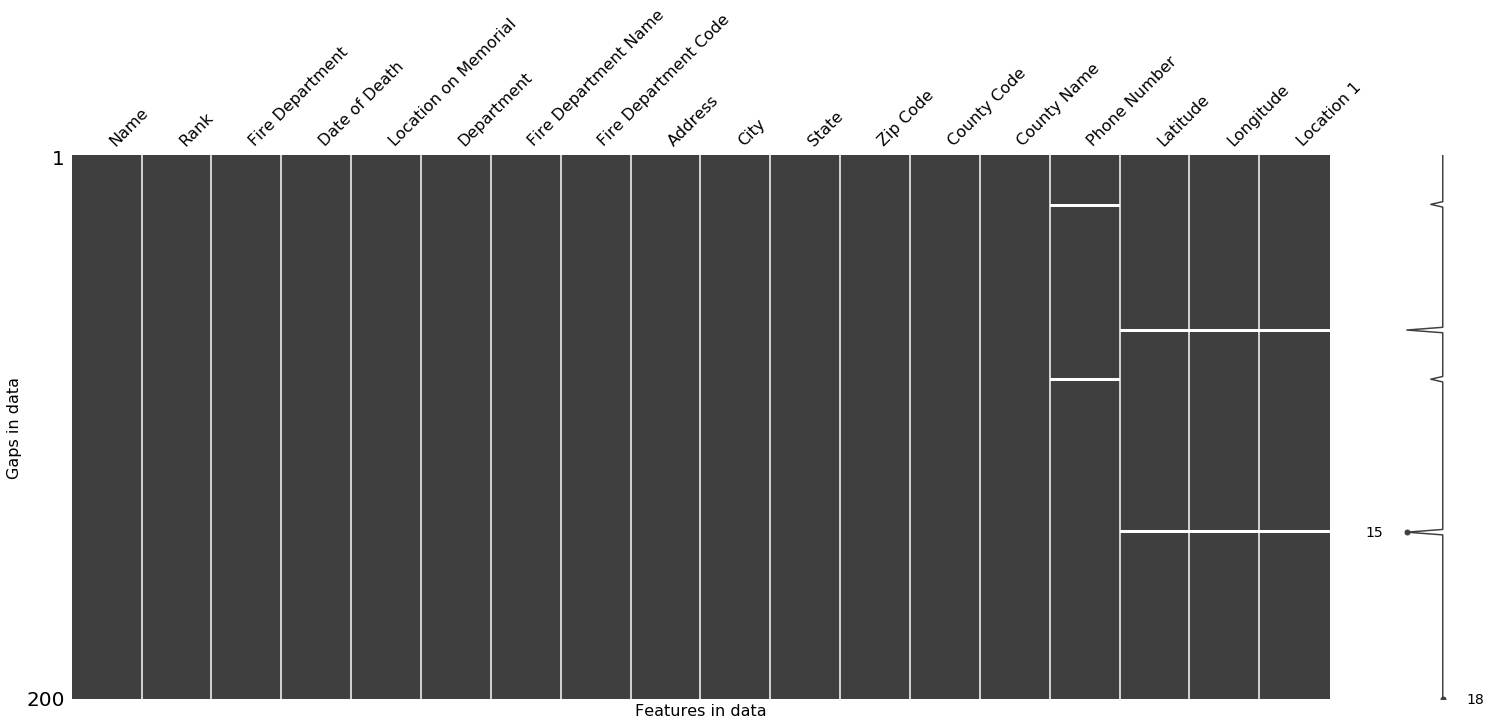

In [57]:
"""
Searching for missing data in sample set of 200 randomly selected data points
"""
_=msno.matrix(merge_df.sample(200))
plt.xlabel('Features in data',fontsize=16)
plt.ylabel('Gaps in data',fontsize=16)
plt.show()

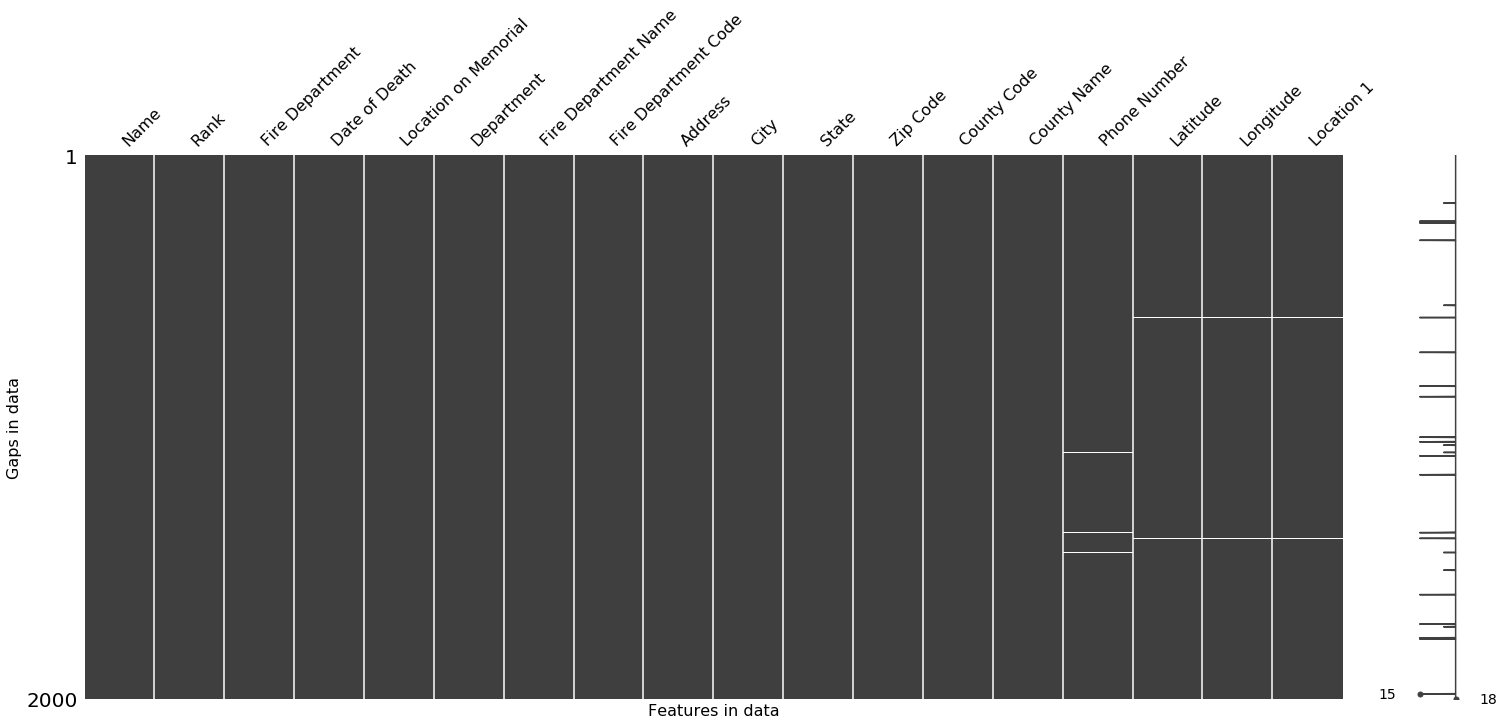

In [58]:
"""
Searching for missing data in sample set of 2000 randomly selected data points
"""
_=msno.matrix(merge_df.sample(2000))
plt.xlabel('Features in data',fontsize=16)
plt.ylabel('Gaps in data',fontsize=16)
plt.show()

From the graphs one can see the data has some missing values for few columns like Date of Death, Phone Number, Latitude, Longitude, Location 1.

#### Data Clean up


I will perform the following tasks:
* Drop all rows and columns where entire row or column is NaN.
* Drop columns with duplicate data or with 50% missing value.
* Drop columns where all rows have the same value.
    * Such columns have no data variety and nothing useful to contribute to my data analysis.

In [59]:
print('Shape of data frame before Cleanup :',merge_df.shape)

print('Drop all rows and columns where entire row or column is NaN.')
merge_df.dropna(how='all',axis=0,inplace=True) # rows 
merge_df.dropna(how='all',axis=1,inplace=True) # columns

print('Drop columns with duplicate data or with 50% missing value.')
half_count = len(merge_df)*.5
merge_df = merge_df.dropna(thresh=half_count, axis=1)
merge_df = merge_df.drop_duplicates()

print('Drop columns where all rows have the same value.')
for this_column in merge_df.columns:
    if (merge_df[this_column].nunique()==1):
        unique_entry=merge_df.iloc[0][this_column]
        print('Drop column ',this_column,' where all rows have the same value : ', unique_entry)
        merge_df.drop([this_column],axis=1,inplace=True)
        
print('Shape of data frame after cleanup :',merge_df.shape)

Shape of data frame before Cleanup : (2461, 18)
Drop all rows and columns where entire row or column is NaN.
Drop columns with duplicate data or with 50% missing value.
Drop columns where all rows have the same value.
Drop column  State  where all rows have the same value :  ny
Shape of data frame after cleanup : (2461, 17)


#### Through the above process I was able to conclude that in my dataset...
* There are no rows and columns where entire row or column is NaN.
* There are no columns with duplicate data and with 50% missing value.
* There is one column, State where all rows have the same value. 
    - Hence, I will be dropping the column State as it has no data variety and nothing useful to contribute to my data analysis.

### Missing data detection and fill up using random sampling in a meaningful way 
**That is get data from the same County Name**

In [60]:
merge_df.head().T

,0,1,2,3,4
Name,abe dias,benjamin nelson,joseph albert,william e. hughes,abraham price
Rank,firefighter,firefighter,firefighter,firefighter,captain
Fire Department,haverstraw fire department,haverstraw fire department,haverstraw fire department,haverstraw fire department,rochester fire department
Date of Death,1906-01-08 00:00:00,1906-01-08 00:00:00,1906-01-08 00:00:00,1906-01-08 00:00:00,1924-04-26 00:00:00
Location on Memorial,20 bottom,16 top,20 top,15 top,5 top
Department,haverstraw,haverstraw,haverstraw,haverstraw,rochester
Fire Department Name,haverstraw fire department,haverstraw fire department,haverstraw fire department,haverstraw fire department,rochester fire dept (city)
Fire Department Code,44004,44004,44004,44004,28008
Address,25 fairmount avenue,25 fairmount avenue,25 fairmount avenue,25 fairmount avenue,185 exchange blvd suite 660
City,haverstraw,haverstraw,haverstraw,haverstraw,rochester


In [61]:
"""
Counting null data per column 
"""
merge_df.isnull().sum()

Name                     0
Rank                     0
Fire Department          0
Date of Death            1
Location on Memorial     0
Department               0
Fire Department Name     0
Fire Department Code     0
Address                  0
City                     0
Zip Code                 0
County Code              0
County Name              0
Phone Number             7
Latitude                26
Longitude               26
Location 1              26
dtype: int64

In [62]:
"""
Percentage of missing data per column
"""
(merge_df.isnull().sum()/len(merge_df)).sort_values(ascending=False)

Location 1              0.010565
Latitude                0.010565
Longitude               0.010565
Phone Number            0.002844
Date of Death           0.000406
Fire Department Name    0.000000
Rank                    0.000000
Fire Department         0.000000
Location on Memorial    0.000000
Department              0.000000
Address                 0.000000
Fire Department Code    0.000000
City                    0.000000
Zip Code                0.000000
County Code             0.000000
County Name             0.000000
Name                    0.000000
dtype: float64

#### I was able to find that Location 1, Latitude, Longitude, Phone Number, Date of Death columns have some missing data

**Filling up missing data of Location 1, Latitude and Longitude through sampling of data in same County Name**

In [63]:
print("Data index for missing Location 1 : ",list(merge_df[merge_df['Location 1'].isnull()].index))
print("Data index for missing Latitude : ",list(merge_df[merge_df['Latitude'].isnull()].index))
print("Data index for missing Longitude : ",list(merge_df[merge_df['Longitude'].isnull()].index))

Data index for missing Location 1 :  [1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1752, 2351, 2445]
Data index for missing Latitude :  [1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1752, 2351, 2445]
Data index for missing Longitude :  [1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1752, 2351, 2445]


In [64]:
'''
County Name based sampling for Location 1, Latitude and Longitude data 
'''
location1_smapling_dict={}
latitude_smapling_dict={}
longitude_smapling_dict={}
null_index=list(merge_df[merge_df['Location 1'].isnull()].index)
print(null_index)

for indx in null_index:
    print('index :',indx)
    this_county=merge_df.iloc[indx]['County Name']
    print(this_county)
    sample_location1=random.choice(list(merge_df[(merge_df['County Name']==this_county) 
                                                  & (merge_df['Location 1'].notnull())]['Location 1']))
    
    sample_latitude=float(sample_location1.split(',')[0][1:])
    sample_longitude=float(sample_location1.split(',')[1][:-1].strip())

    location1_smapling_dict[indx]=sample_location1
    latitude_smapling_dict[indx]=sample_latitude
    longitude_smapling_dict[indx]=sample_longitude
    
print(location1_smapling_dict)
print(latitude_smapling_dict)
print(longitude_smapling_dict)

[1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1752, 2351, 2445]
index : 1715
broome
index : 1716
broome
index : 1717
broome
index : 1718
broome
index : 1719
broome
index : 1720
broome
index : 1721
broome
index : 1722
broome
index : 1723
broome
index : 1724
broome
index : 1725
broome
index : 1726
broome
index : 1727
broome
index : 1728
broome
index : 1729
broome
index : 1730
broome
index : 1731
broome
index : 1732
broome
index : 1733
broome
index : 1734
broome
index : 1735
broome
index : 1736
broome
index : 1737
broome
index : 1752
nassau
index : 2351
nassau
index : 2445
columbia
{1715: '(42.111249, -76.073003)', 1716: '(42.162783, -75.894162)', 1717: '(42.06305, -75.42649)', 1718: '(42.111249, -76.073003)', 1719: '(42.06305, -75.42649)', 1720: '(42.23717, -76.05457)', 1721: '(42.162783, -75.894162)', 1722: '(42.098898, -76.049109)', 1723: '(42.162783, -75.894162)', 1724: '(42.083166, -76.065433

In [65]:
'''
Filling up the missing values of Location 1, Latitude and Longitude with sampled data
'''
merge_df['Location 1'].fillna(location1_smapling_dict,inplace=True)
merge_df['Latitude'].fillna(latitude_smapling_dict,inplace=True)
merge_df['Longitude'].fillna(longitude_smapling_dict,inplace=True)

**Filling up missing data of Phone Number through sampling of data in same County Name**

In [66]:
print("Data index for missing Phone Number : ",list(merge_df[merge_df['Phone Number'].isnull()].index))

Data index for missing Phone Number :  [1839, 1840, 1889, 2002, 2003, 2294, 2375]


In [67]:
'''
County Name based sampling for Phone Number data 
'''
phone_number_smapling_dict={}
null_phone_number_index=list(merge_df[merge_df['Phone Number'].isnull()].index)
print(null_phone_number_index)

for indx in null_phone_number_index:
    print('index :',indx)
    this_county=merge_df.iloc[indx]['County Name']
    print(this_county)
    sample_phone_number=random.choice(list(merge_df[(merge_df['County Name']==this_county) 
                                                     & (merge_df['Phone Number'].notnull())]['Phone Number']))
    
    
    phone_number_smapling_dict[indx]=sample_phone_number
    
print(phone_number_smapling_dict)

[1839, 1840, 1889, 2002, 2003, 2294, 2375]
index : 1839
oneida
index : 1840
oneida
index : 1889
ulster
index : 2002
broome
index : 2003
broome
index : 2294
ulster
index : 2375
ulster
{1839: 3158536884.0, 1840: 3157245151.0, 1889: 8453311959.0, 2002: 6077727016.0, 2003: 6077727016.0, 2294: 8453311959.0, 2375: 8453388422.0}


In [68]:
'''
Filling up the missing values of Phone Number with sampled data
'''
merge_df['Phone Number'].fillna(phone_number_smapling_dict,inplace=True)

**Filling up missing data of Date of Death through sampling of data in same County Name**

In [69]:
print("Data index for missing Date of Death : ",list(merge_df[merge_df['Date of Death'].isnull()].index))

Data index for missing Date of Death :  [2059]


In [70]:
'''
County Name based sampling for Date of Death data 
'''
null_date_of_death_index=list(merge_df[merge_df['Date of Death'].isnull()].index)
print('null_date_of_death_index : ',null_date_of_death_index)

this_county=merge_df.iloc[null_date_of_death_index]['County Name'].values
print('this_county : ',this_county)

sample_date_of_death=datetime.strftime(random.choice(list(merge_df[(merge_df['County Name']==this_county) &
                                                                   (merge_df['Date of Death'].notnull())]['Date of Death'])),'%m/%d/%Y')
print('sample_date_of_death : ',sample_date_of_death)

sample_date_of_death_in_datetime=datetime.strptime(sample_date_of_death,'%m/%d/%Y')
print('sample_date_of_death_in_datetime : ',sample_date_of_death_in_datetime)

null_date_of_death_index :  [2059]
this_county :  [orange]
Categories (58, object): [albany, allegany, broome, cattaraugus, ..., wayne, westchester, wyoming, yates]
sample_date_of_death :  02/03/2015
sample_date_of_death_in_datetime :  2015-02-03 00:00:00


In [71]:
'''
Filling up the missing values of Date of Death with sampled data
'''
merge_df['Date of Death'].fillna(sample_date_of_death_in_datetime,inplace=True)

In [72]:
merge_df.isnull().sum()

Name                    0
Rank                    0
Fire Department         0
Date of Death           0
Location on Memorial    0
Department              0
Fire Department Name    0
Fire Department Code    0
Address                 0
City                    0
Zip Code                0
County Code             0
County Name             0
Phone Number            0
Latitude                0
Longitude               0
Location 1              0
dtype: int64

**Missing data have been filled up successfully for Location 1, Latitude, Longitude, Phone Number and Date of Death columns**

## Start of data analysis - Visualization and Exploratory Data Analysis
***... for merged data of New_York_State_Fallen_Firefighters_Memorial_Roll_of_Honor, Fire_Department_Directory_for_New_York_State in New York State***

Let's ask our data some questions about fire fighter fatalities in New York State.

* Let's start with some basic questions that combines the fatality count from one dataset with the county/city data from another.
* Which county and/or city had a high fatality count?

* **Top ten fatality count by county for New York State fire departments**

In [73]:
merge_df['County Name']=merge_df['County Name'].apply(lambda x : x.strip())
merge_df.groupby('County Name')['Name'].count().sort_values(ascending=False).head(10)

County Name
new york       1349
erie            161
nassau          109
suffolk          96
westchester      74
monroe           71
onondaga         70
albany           63
rensselaer       34
broome           34
Name: Name, dtype: int64

* **Top ten fatality count by city for fire departments in New York State**

In [74]:
merge_df['City']=merge_df['City'].apply(lambda x : x.strip())
merge_df.groupby('City')['Name'].count().sort_values(ascending=False).head(10)

City
brooklyn       1349
buffalo         125
rochester        59
albany           52
syracuse         46
troy             27
binghamton       25
yonkers          18
schenectady      13
auburn           12
Name: Name, dtype: int64

**The answer to the question is Brooklyn, New York County, New York has had some very high fatality counts. I will now dive deeper into the data to find more about patterns in fatalities in New York State's fire departments.**

**Method defined to compute normalized value for a column of dataframe**

Formula for normalization [used](https://www.statisticshowto.datasciencecentral.com/normalized/) is as follows:

$\mathbf{X_{new}} = {X - X_{min} \over X_{max} - X_{min}}$

In [75]:
'''
This method will return the value normalized between 0 and 1, given a number, maximum value and minimum value of the column in the dataframe
'''
def compute_norm(number, max_val, min_val):
    return (number - min_val)/(max_val - min_val)

In [76]:
'''
This method will take a dataframe and return a dataframe with one extra column of normalized values for the colum of dataframe that 
needs to be normalized. Created as I will reuse this a number of times.
'''
def get_normalized_value_df(df_to_process, name_of_column_to_normalize):
    norm_df = df_to_process
    
    normalized_value_list = []
    for num in np.array(norm_df[name_of_column_to_normalize]):
        normalized_value_list.append(compute_norm(number=float(num),
                                                  max_val=float(norm_df[name_of_column_to_normalize].nlargest(1)), 
                                                  min_val=float(norm_df[name_of_column_to_normalize].nsmallest(1))
                                                 )
                                    )
    norm_df['normalized_'+name_of_column_to_normalize] = normalized_value_list
    return norm_df

**Processing date time to extract year, month of death**

In [77]:
'''
Counting the number of fatalities in each of the top five fatal years
'''
merge_df['Year'] = merge_df['Date of Death'].apply(lambda time: time.year)
merge_df['Year'].value_counts().head()

2001    356
1978     35
1945     31
1959     30
1956     30
Name: Year, dtype: int64

In [78]:
'''
Counting the number of fatalities by month
'''
merge_df['Month'] = (merge_df['Date of Death'].dt.month).apply(lambda x : calendar.month_abbr[int(x)])
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
merge_df['Month'] = pd.Categorical(merge_df['Month'], 
                                   categories=months,
                                   ordered=True)
merge_df['Month'].value_counts()

Sep    467
Jan    350
Feb    202
Dec    177
Apr    176
Nov    171
Jul    170
Mar    161
Aug    160
May    158
Oct    142
Jun    127
Name: Month, dtype: int64

**Above two analysis indicates that there was some significant incident that happened in the month of September. It also indicates that 2001 was a dangerous year for firefighters**

* As I have two different datasets, one with records of dates of an incident and the other has relevant location information, if I combine the two datasets I can infer **when** and **where** such an incident occurred!
* Hence, I am trying to visualize dates by fatality count for top five fatal years and top five fatal counties combination.

### **Exploring fatalities by date of death for a county in New York State**

* **Extracting the top five fatal counties by fatality count for processing**

In [79]:
top_counties_of_fire_fighter_death = merge_df.groupby(['County Name'])['Name'].count().sort_values(ascending=False).head().index.values
top_counties_of_fire_fighter_death

[new york, erie, nassau, suffolk, westchester]
Categories (58, object): [albany, allegany, broome, cattaraugus, ..., wayne, westchester, wyoming, yates]

In [80]:
top_counties_of_fire_fighter_death_df = merge_df[merge_df['County Name'].isin(top_counties_of_fire_fighter_death)]

* **Extracting the top five years by fatality count for processing**

In [81]:
top_five_year_of_fire_fighter_death = merge_df.groupby(['Year'])['Name'].count().sort_values(ascending=False).head().index.values
top_five_year_of_fire_fighter_death

array([2001, 1978, 1945, 1959, 1974])

* **Extracting the top five years from top five fatal counties by fatality count for processing**

In [82]:
top_death_county_year_df = top_counties_of_fire_fighter_death_df[
                           top_counties_of_fire_fighter_death_df['Year'].isin(top_five_year_of_fire_fighter_death)]

In [83]:
top_date_of_death_county_df=pd.DataFrame(list(top_death_county_year_df.groupby(['Date of Death','County Name'])['Name']
                                              .count().sort_values(ascending=False).head(10).items()),
                                         columns=['date_of_death_county_combo','death_count'])

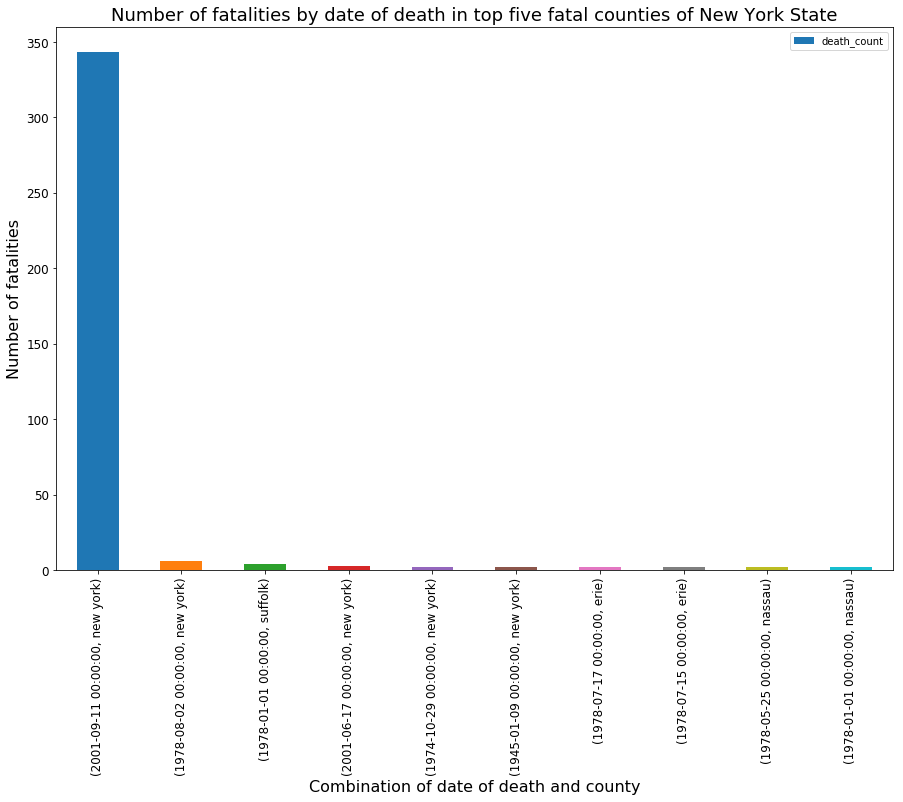

In [84]:
top_date_of_death_county_df.plot.bar(x='date_of_death_county_combo',y='death_count',figsize=(15,10))
plt.title('Number of fatalities by date of death in top five fatal counties of '+ NY,fontsize=18)
plt.setp(plt.gca().get_xticklabels(), rotation=90, fontsize=12)
plt.setp(plt.gca().get_yticklabels(), fontsize=12)
plt.xlabel('Combination of date of death and county',fontsize=16)
plt.ylabel('Number of fatalities',fontsize=16)
plt.show()

In [85]:
'''
Computing the normalized count of fatalities by date of death for top five fatal years in top five fatal counties
I am computing normalized count to detect if 2001-09-11 combined with New York County is an outlier in terms of number of fatalities.
'''
top_date_of_death_county_norm_df = get_normalized_value_df(df_to_process=top_date_of_death_county_df,
                                                           name_of_column_to_normalize='death_count')
top_date_of_death_county_norm_df

,date_of_death_county_combo,death_count,normalized_death_count
0,"(2001-09-11 00:00:00, new york)",343,1.000000
1,"(1978-08-02 00:00:00, new york)",6,0.011730
2,"(1978-01-01 00:00:00, suffolk)",4,0.005865
3,"(2001-06-17 00:00:00, new york)",3,0.002933
4,"(1974-10-29 00:00:00, new york)",2,0.000000
5,"(1945-01-09 00:00:00, new york)",2,0.000000
6,"(1978-07-17 00:00:00, erie)",2,0.000000
7,"(1978-07-15 00:00:00, erie)",2,0.000000
8,"(1978-05-25 00:00:00, nassau)",2,0.000000
9,"(1978-01-01 00:00:00, nassau)",2,0.000000


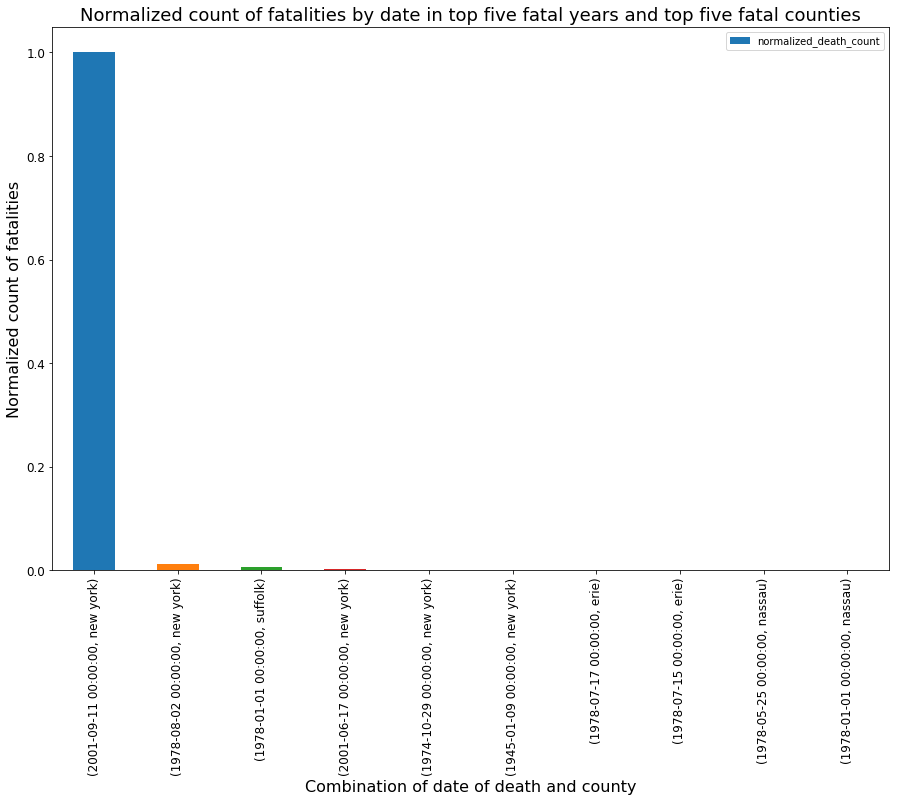

In [86]:
top_date_of_death_county_norm_df.plot.bar(x='date_of_death_county_combo', y='normalized_death_count', figsize=(15,10))
plt.setp(plt.gca().get_xticklabels(), rotation=90, fontsize=12)
plt.setp(plt.gca().get_yticklabels(), fontsize=12)
plt.xlabel('Combination of date of death and county',fontsize=16)
plt.ylabel('Normalized count of fatalities',fontsize=16)
plt.title('Normalized count of fatalities by date in top five fatal years and top five fatal counties',fontsize=18)
plt.show()

### Key observation: 
**Combining the two datasets** I am able to infer that on **September 11, 2001, New York County** happened to face a severe crisis, in which hundreds of firefighters gave their lives.

Answering our question 1 - Everyone knows about September 11th, 2001 and that people died but can it be determined from the combined data, which county most of the firefighters came from?

* The firefighters that sacrificed their lives on 9/11 they came from **New York County**.

**Story time**

9/11 was one of the biggest terrorist attacks in American History on American soil killing thousands of people. 
* This [link](https://en.wikipedia.org/wiki/Emergency_workers_killed_in_the_September_11_attacks) specifies that on that day: 
    * "Of the 2,977 victims killed in the September 11 attacks, 412 were emergency workers in New York City who responded to the World Trade Center." 
    * "This included: **343 firefighters** (including a chaplain and two paramedics) of the New York City Fire Department (FDNY)".
    * The top_date_of_death_county_df shows that on 9/11, 2001 New York County had 343 fatalities.

* **Thus by combining two datasets I am able to prove that using the power of data analysis one may make fairly accurate inferences about real-life incidents.**

Next, I will try to find the answer to my second question - During 9/11 was there a fire department where most of the fatalities occurred?
* For that purpose I will try and extract the location data for the department address and combine that with fatality count. Both these pieces of data are present in my merged dataframe and will help me determine the exact department.

**Top ten fire department location for incident**

In [87]:
top_death_year_df=merge_df[merge_df['Year'].isin(top_five_year_of_fire_fighter_death)]
top_death_date_address_wise_df=top_death_year_df.groupby(['Date of Death','Address'])['Name'].count().sort_values(ascending=False).head(21)

In [88]:
top_death_date_address_df=pd.DataFrame(list(top_death_date_address_wise_df.items()),
                                       columns=['date_of_death_address_combo','death_count'])

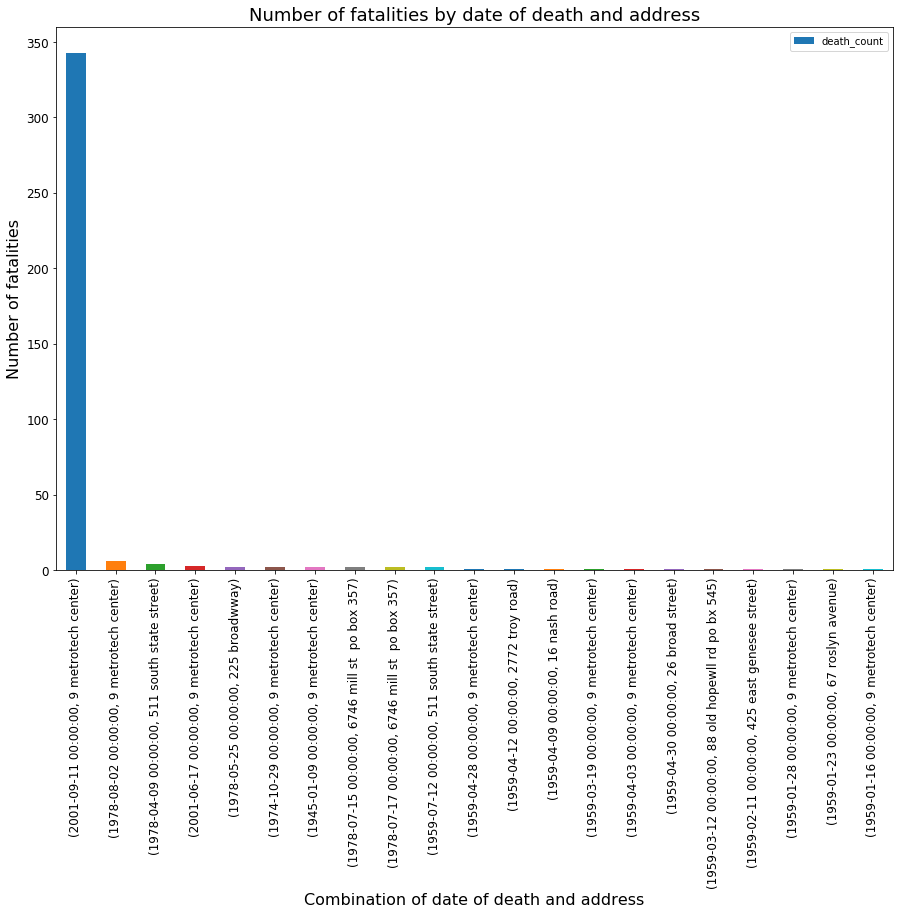

In [89]:
top_death_date_address_df.plot.bar(x='date_of_death_address_combo',y='death_count',figsize=(15,10))
plt.setp(plt.gca().get_xticklabels(), rotation=90, fontsize=12)
plt.setp(plt.gca().get_yticklabels(), fontsize=12)
plt.xlabel('Combination of date of death and address',fontsize=16)
plt.ylabel('Number of fatalities',fontsize=16)
plt.title('Number of fatalities by date of death and address',fontsize=18)
plt.show()

In [90]:
'''
Computing the normalized count of fatalities for addresses
I am computing normalized counts to detect if address and 2001-09-01 has outliers for number of fatalities.
'''
top_death_date_address_norm_df = get_normalized_value_df(df_to_process=top_death_date_address_df,
                                                         name_of_column_to_normalize='death_count')

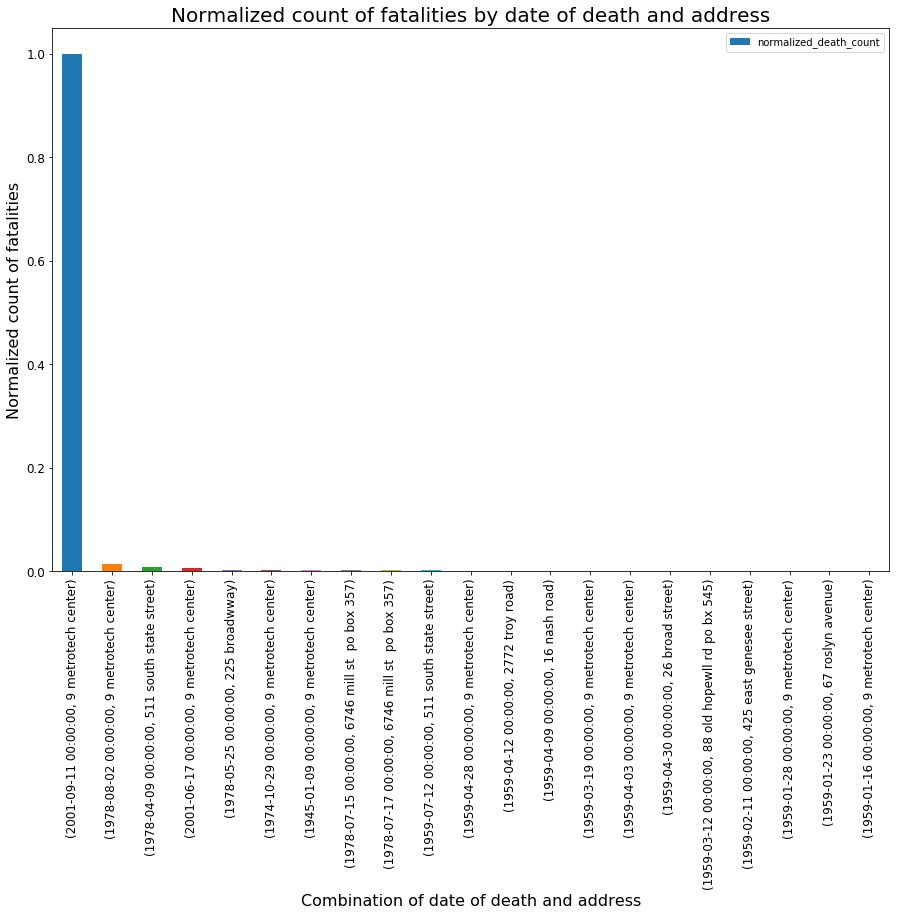

In [91]:
top_death_date_address_norm_df.plot.bar(x='date_of_death_address_combo', y='normalized_death_count', figsize=(15,10))
plt.setp(plt.gca().get_xticklabels(), rotation=90, fontsize=12)
plt.setp(plt.gca().get_yticklabels(), fontsize=12)
plt.xlabel('Combination of date of death and address',fontsize=16)
plt.ylabel('Normalized count of fatalities',fontsize=16)
plt.title('Normalized count of fatalities by date of death and address',fontsize=20)
plt.show()

* From the chart above I was able to determine that "9 metrotech center" of Brooklyn New York is the station from which most of the firefighters operated.
* Intuitively this looks reasonable as the World Trade Center is in lower Manhattan that is very close to Brooklyn by waterways.
* Thus, I have answered the **second** question.

Our **third** question is about ranks of firefighters who passed away on 9/11 - It is understandable that there will be few high ranking officials directly involved in rescue operations. Does the combined data tell us the ranks of the firefighters that sacrificed their lives?

* I do have rank information in the firefighter dataset. I can combine the date of deaths with county of fire department in the other dataset to determine the ranks of firefighters that died on 9/11.

**Analyzing fatalities by county and firefighter ranks**

In [92]:
top_five_rank_of_fire_fighter_death = merge_df.groupby(['Rank'])['Name'].count().sort_values(ascending=False).head().index.values
top_five_rank_of_fire_fighter_death

[firefighter, lieutenant, captain, firefighter, battalion chief]
Categories (84, object): [1st assistant chief, 1st deputy commissioner, 2nd assistant chief, 2nd assistant foreman, ..., supervising fire marshal, tillerman, training instructor, truckman]

In [93]:
top_death_county_year_rank_df = top_death_county_year_df[
                                top_death_county_year_df['Rank'].isin(top_five_rank_of_fire_fighter_death)]

In [94]:
top_death_date_of_death_county_rank_df=pd.DataFrame(list(top_death_county_year_rank_df.groupby(['Date of Death','County Name','Rank'])['Name']
                                                    .count().sort_values(ascending=False).head(10).items()),
                                                   columns=['date_of_death_county_rank_combo','death_count'])

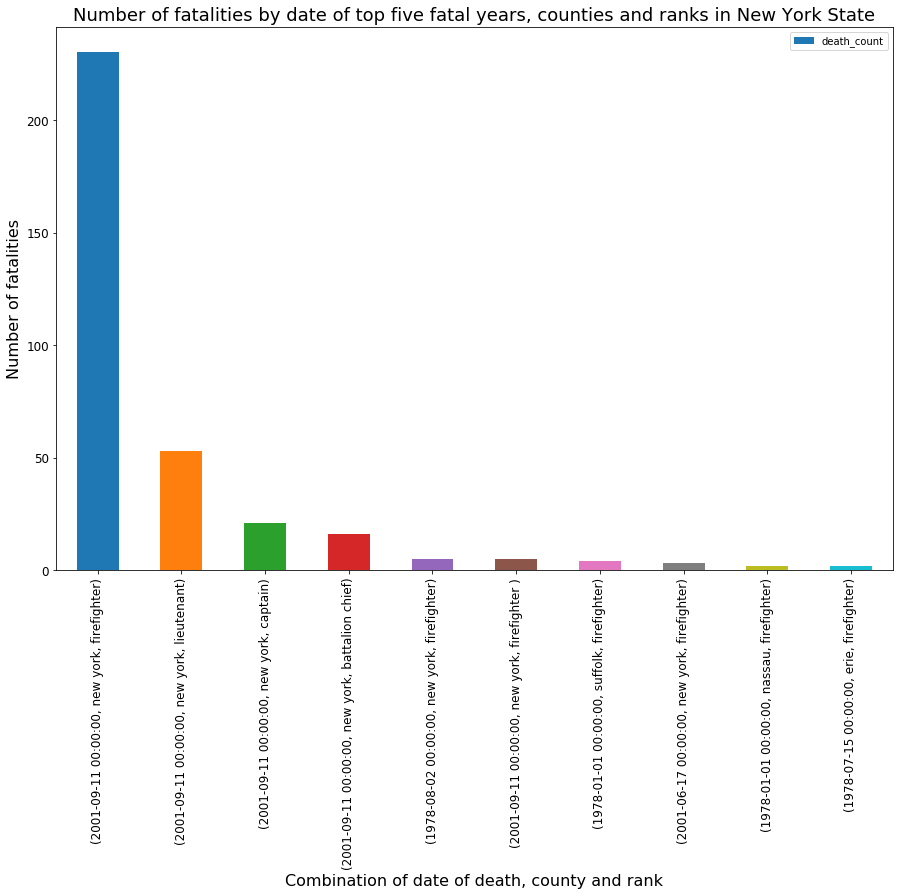

In [95]:
top_death_date_of_death_county_rank_df.plot.bar(x='date_of_death_county_rank_combo',y='death_count',figsize=(15,10))
plt.title('Number of fatalities by date of top five fatal years, counties and ranks in ' + NY,fontsize=18)
plt.setp(plt.gca().get_xticklabels(), rotation=90, fontsize=12)
plt.setp(plt.gca().get_yticklabels(), fontsize=12)
plt.xlabel('Combination of date of death, county and rank',fontsize=16)
plt.ylabel('Number of fatalities',fontsize=16)
plt.show()

In [96]:
'''
Computing the normalized count of fatalities for top five fatal counties and rank
I am computing normalized counts to detect if new york, 2001-09-11, firefighter has outliers for number of fatalities.
'''
top_death_date_of_death_county_rank_norm_df = get_normalized_value_df(df_to_process=top_death_date_of_death_county_rank_df,
                                                                      name_of_column_to_normalize='death_count')

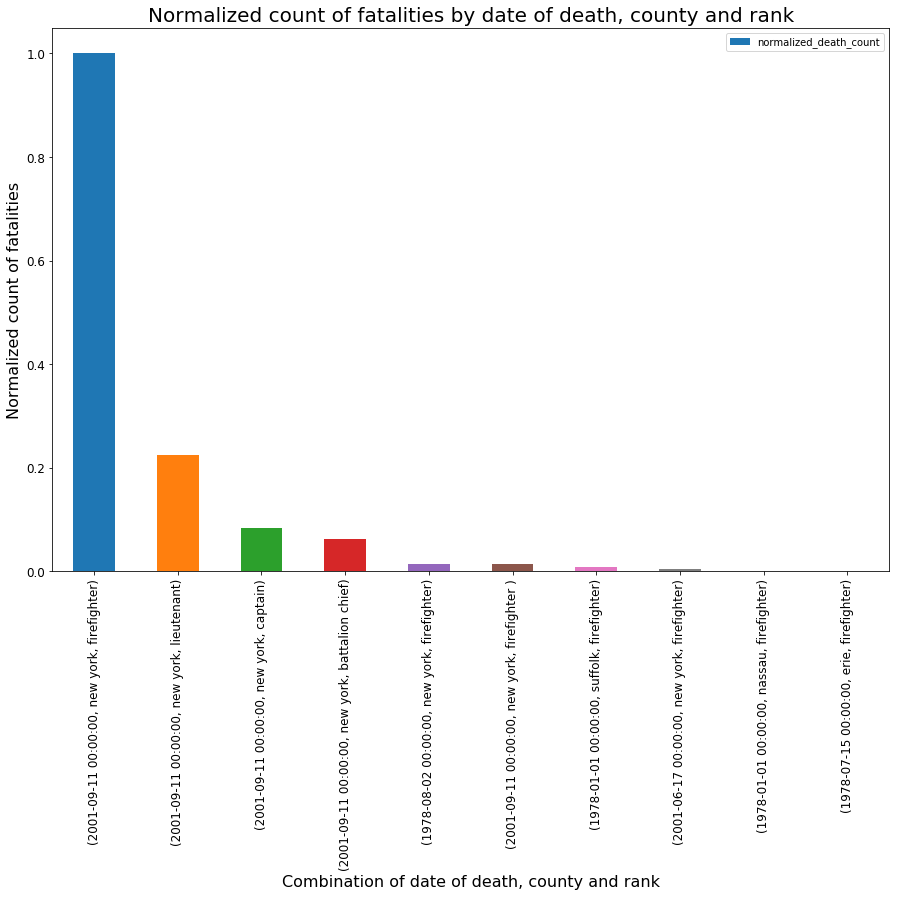

In [97]:
top_death_date_of_death_county_rank_norm_df.plot.bar(x='date_of_death_county_rank_combo', y='normalized_death_count', figsize=(15,10))
plt.setp(plt.gca().get_xticklabels(), rotation=90, fontsize=12)
plt.setp(plt.gca().get_yticklabels(), fontsize=12)
plt.xlabel('Combination of date of death, county and rank',fontsize=16)
plt.ylabel('Normalized count of fatalities',fontsize=16)
plt.title('Normalized count of fatalities by date of death, county and rank',fontsize=20)
plt.show()

* From the chart above I was able to determine that most fatalities on 9/11 happened for the "Firefighter" rank. 
* The second highest fatalities were for "Lieutenant" rank followed by "Captain" and "Battallion Chief".
* This [link](https://en.wikipedia.org/wiki/New_York_City_Fire_Department#Ranks_of_the_FDNY) shows that a "Firefighter" is in-fact the lowest ranked official in the Fire Department of New York(FDNY).
* This answers my **third** question.

* The chart above can also help answer the **fourth** question I had - Is there any incident comparable to 9/11 in terms of fire fighter fatalities? Where did such an incident occur?
    * No, there is no incident, as per the datasets that can compare to 9/11, in terms of fatalities. However, it looks like on August 2nd, 1978 there was an incident that might have caused some fatalities. After googling around, I found that the [Waldbaum Fire on August 2, 1978](https://www.youtube.com/watch?v=pTzBg1YIZmI) had killed six firefighters.


* My **fifth** and final question was about trying to visualize fatalities across the whole state of New York - Which fire departments across the state of New York have had the most fatalities? Can the top ten fatal locations be represented visually with information about the most fatal incident for that location?
    * I will try to visualize that now.
    * I have not normalized the data because I want to show the count of fatalities.

In [98]:
'''
For this visualizaton I am using previously created dataframe for top ten fatal location to get the address, date_of_death and death_counts 
value in different columns.I am breaking up the tuple in column date_of_death_address_combo to obtain the individual columns mentioned.
'''
top_death_count_date_address_list=[]
for date_address_tuple in list(top_death_date_address_df['date_of_death_address_combo']):
    death_count_date_address_dict ={}
    death_count_date_address_dict['death_count'] =top_death_date_address_df[top_death_date_address_df['date_of_death_address_combo']==date_address_tuple].iloc[0]['death_count']
    death_count_date_address_dict['date_of_death'] =date_address_tuple[0]
    death_count_date_address_dict['address'] =date_address_tuple[1]
    top_death_count_date_address_list.append(death_count_date_address_dict)
top_death_count_date_address_df=pd.DataFrame(top_death_count_date_address_list)
top_death_count_date_address_df

,address,date_of_death,death_count
0,9 metrotech center,2001-09-11,343
1,9 metrotech center,1978-08-02,6
2,511 south state street,1978-04-09,4
3,9 metrotech center,2001-06-17,3
4,225 broadwway,1978-05-25,2
5,9 metrotech center,1974-10-29,2
6,9 metrotech center,1945-01-09,2
7,6746 mill st po box 357,1978-07-15,2
8,6746 mill st po box 357,1978-07-17,2
9,511 south state street,1959-07-12,2


In [99]:
location_list=[]
all_loc_dict = {}
indx = 0
for address in list(top_death_count_date_address_df['address']):
    
    county=merge_df[merge_df['Address']==address].iloc[0]['County Name']
    city=merge_df[merge_df['Address']==address].iloc[0]['City']
    zip_code=merge_df[merge_df['Address']==address].iloc[0]['Zip Code']
    full_address=address + ", " + county + " county, " + city + " city, " + NY + ", " + zip_code
    latitude=merge_df[merge_df['Address']==address].iloc[0]['Latitude']
    longitude=merge_df[merge_df['Address']==address].iloc[0]['Longitude']
    location1=merge_df[merge_df['Address']==address].iloc[0]['Location 1']
    date_of_death=top_death_count_date_address_df.iloc[indx]['date_of_death']
    death_count=top_death_count_date_address_df.iloc[indx]['death_count']
    
    '''
    Ignoring a location if it is repeating in the list.
    As top_death_count_date_address_df is sorted by count of fatalities I will get the highest fatality count for an address
    '''
    if address not in list(all_loc_dict.keys()):
        location_dict={}
        location_dict['latitude']=latitude
        location_dict['longitude']=longitude
        location_dict['location']=location1
        location_dict['lat_long']=[latitude,longitude]
        location_dict['full_address']=full_address
        location_dict['date_of_death']=date_of_death
        location_dict['death_count']=death_count
        all_loc_dict[address] = location_dict
    indx += 1

for address_key, location_value in all_loc_dict.items():
    location_list.append(location_value)

location_df = pd.DataFrame(location_list)
location_df

,date_of_death,death_count,full_address,lat_long,latitude,location,longitude
0,2001-09-11,343,"9 metrotech center, new york county, brooklyn ...","[40.69384, -73.9871]",40.693840,"(40.69384, -73.9871)",-73.987100
1,1978-04-09,4,"511 south state street, onondaga county, syrac...","[43.046921, -76.147406]",43.046921,"(43.046921, -76.147406)",-76.147406
2,1978-05-25,2,"225 broadwway, nassau county, bethpage city, N...","[40.738833, -73.479646]",40.738833,"(40.738833, -73.479646)",-73.479646
3,1978-07-15,2,"6746 mill st po box 357, erie county, boston ...","[42.628713, -78.738227]",42.628713,"(42.628713, -78.738227)",-78.738227
4,1959-04-12,1,"2772 troy road, schenectady county, schenectad...","[42.804901, -73.893102]",42.804901,"(42.804901, -73.893102)",-73.893102
5,1959-04-09,1,"16 nash road, erie county, kenmore city, New Y...","[42.965344, -78.869445]",42.965344,"(42.965344, -78.869445)",-78.869445
6,1959-04-30,1,"26 broad street, albany county, albany city, N...","[42.662577, -73.759898]",42.662577,"(42.662577, -73.759898)",-73.759898
7,1959-03-12,1,"88 old hopewll rd po bx 545, dutchess county, ...","[41.57888, -73.91097]",41.578880,"(41.57888, -73.91097)",-73.910970
8,1959-02-11,1,"425 east genesee street, onondaga county, faye...","[43.02976, -76.005992]",43.029760,"(43.02976, -76.005992)",-76.005992
9,1959-01-23,1,"67 roslyn avenue, nassau county, sea cliff cit...","[40.84858, -73.644801]",40.848580,"(40.84858, -73.644801)",-73.644801


In [100]:
def regioncolors(num_of_death):
    if num_of_death > 100:
        return 'red'
    else:
        return 'darkgreen'
location_df["color"] = location_df['death_count'].apply(regioncolors)
location_df

,date_of_death,death_count,full_address,lat_long,latitude,location,longitude,color
0,2001-09-11,343,"9 metrotech center, new york county, brooklyn ...","[40.69384, -73.9871]",40.693840,"(40.69384, -73.9871)",-73.987100,red
1,1978-04-09,4,"511 south state street, onondaga county, syrac...","[43.046921, -76.147406]",43.046921,"(43.046921, -76.147406)",-76.147406,darkgreen
2,1978-05-25,2,"225 broadwway, nassau county, bethpage city, N...","[40.738833, -73.479646]",40.738833,"(40.738833, -73.479646)",-73.479646,darkgreen
3,1978-07-15,2,"6746 mill st po box 357, erie county, boston ...","[42.628713, -78.738227]",42.628713,"(42.628713, -78.738227)",-78.738227,darkgreen
4,1959-04-12,1,"2772 troy road, schenectady county, schenectad...","[42.804901, -73.893102]",42.804901,"(42.804901, -73.893102)",-73.893102,darkgreen
5,1959-04-09,1,"16 nash road, erie county, kenmore city, New Y...","[42.965344, -78.869445]",42.965344,"(42.965344, -78.869445)",-78.869445,darkgreen
6,1959-04-30,1,"26 broad street, albany county, albany city, N...","[42.662577, -73.759898]",42.662577,"(42.662577, -73.759898)",-73.759898,darkgreen
7,1959-03-12,1,"88 old hopewll rd po bx 545, dutchess county, ...","[41.57888, -73.91097]",41.578880,"(41.57888, -73.91097)",-73.910970,darkgreen
8,1959-02-11,1,"425 east genesee street, onondaga county, faye...","[43.02976, -76.005992]",43.029760,"(43.02976, -76.005992)",-76.005992,darkgreen
9,1959-01-23,1,"67 roslyn avenue, nassau county, sea cliff cit...","[40.84858, -73.644801]",40.848580,"(40.84858, -73.644801)",-73.644801,darkgreen


Using the [Folium library](https://python-visualization.github.io/folium/quickstart.html) and
[Link](https://georgetsilva.github.io/posts/mapping-points-with-folium/) let's take a look at where the incident locations are in New York State!

In [101]:
folium_map = folium.Map(location=location_df.iloc[0]['lat_long'],
                        zoom_start=7,
                        tiles='Stamen Terrain')
for curr_loc in list(location_df.index):
    folium.Marker(location=location_df.iloc[curr_loc]['lat_long'],
                  popup="Date of most fatal incident : "+
                  datetime.strftime(location_df.iloc[curr_loc]['date_of_death'],'%B,%d,%Y')+
                  " Number of deaths on that date : "+
                  str(location_df.iloc[curr_loc]['death_count'])+
                  " Location : "+
                  location_df.iloc[curr_loc]['full_address'], 
                  icon=folium.Icon(color=location_df.iloc[curr_loc]['color'], 
                                   icon_color='white', 
                                   icon='male', 
                                   angle=0, 
                                   prefix='fa')
                 ).add_to(folium_map)
folium_map

* If you click on each of the markers you can see the dates of the most fatal incident, alongwith number of fatalities.
* The visualization above shows the data for the most fatal incident ranked by top ten most fatal locations across the state of New York.

In [102]:
print('Total Time taken:',time.time() - start_time,'seconds')

Total Time taken: 57.42645597457886 seconds


### Conclusions from Analysis of New York State Fire Department Fallen Heroes Data
* **Key Observation** - **Combining the two datasets** I am able to infer that on **September 11, 2001, New York County** happened to face a severe crisis, in which hundreds of firefighters gave their lives.
    * The firefighters that sacrificed their lives on 9/11 they came from **New York County**.
    * **Story time** - 9/11 was one of the biggest terrorist attacks in American History on American soil killing thousands of people. 
    * This [link](https://en.wikipedia.org/wiki/Emergency_workers_killed_in_the_September_11_attacks) specifies that on that day: 
    * "Of the 2,977 victims killed in the September 11 attacks, 412 were emergency workers in New York City who responded to the World Trade Center." 
    * "This included: **343 firefighters** (including a chaplain and two paramedics) of the New York City Fire Department (FDNY)".
    * My dataframe - top_date_of_death_county_df shows that on 9/11, 2001 New York County had in-fact had 343 fatalities.
* During 9/11 the fire department located at "9 metrotech center", Brooklyn, New York seems to be the station from which most of the firefighters operated.
    * Intuitively this looks reasonable as the World Trade Center is in lower Manhattan that is very close to Brooklyn by waterways.
* I was able to determine that most fatalities on 9/11 happened for the "Firefighter" rank.
    * The second highest fatalities were for "Lieutenant" rank followed by "Captain" and "Battallion Chief".
* Using my analysis I was also able to determine that there is no incident, as per the datasets, that can compare to 9/11, in terms of fatalities. However, it looks like on August 2nd, 1978 there was an incident that might have caused some fatalities. After googling around, I found that the [Waldbaum Fire of August 2, 1978](https://www.youtube.com/watch?v=pTzBg1YIZmI) had killed six firefighters.
* I was also able to visualize using a map of New York State, the dates of the most fatal incident, alongwith count of fatalities. I was able to visualize the most fatal incident ranked by top ten most fatal locations across the state of New York.

### Learnings from Final Project for Data 601

* I learnt about how to merge data from two different datasets and perform meaningful analysis from it.
* I learnt how to deal with messy data and carry out pre-processing in order to find proper key of joining.
* I used my knowledge from project two where I learnt about Folium library that allowed me to visualize data about fatalities from "Fire Department" locations on an actual map and infer occurrences of significant incidents.
* I was able to visualize the impact of an incident like 9/11 and compare that to smaller incidents like the [Waldbaum Fire of August 2, 1978](https://www.youtube.com/watch?v=pTzBg1YIZmI).